In [2]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
data = pd.read_csv('Downloads/Police_Department_Incident_Reports__2018_to_Present.csv')

In [4]:
data.head()

Incident Datetime Incident Date Incident Time  Incident Year  \
0  2020/08/15 12:43:00 PM    2020/08/15         12:43           2020   
1  2018/01/18 07:00:00 PM    2018/01/18         19:00           2018   
2  2020/08/16 03:13:00 AM    2020/08/16         03:13           2020   
3  2020/08/16 03:38:00 AM    2020/08/16         03:38           2020   
4  2020/08/15 09:40:00 AM    2020/08/15         09:40           2020   

  Incident Day of Week         Report Datetime       Row ID  Incident ID  \
0             Saturday  2020/08/15 12:58:00 PM  95308704134       953087   
1             Thursday  2018/01/22 04:59:00 PM  64999771000       649997   
2               Sunday  2020/08/16 03:14:00 AM  95319604083       953196   
3               Sunday  2020/08/16 04:56:00 AM  95326228100       953262   
4             Saturday  2020/08/15 06:21:00 PM  95322706244       953227   

   Incident Number   CAD Number Report Type Code Report Type Description  \
0        200490354  202281583.0               II                 Initial   
1        186068683          NaN               II        Coplogic Initial   
2        200491669  202290313.0               II                 Initial   
3        200491738  202290404.0               II                 Initial   
4        206121692          NaN               II        Coplogic Initial   

  Filed Online  Incident Code   Incident Category    Incident Subcategory  \
0          NaN           4134             Assault          Simple Assault   
1         True          71000       Lost Property           Lost Property   
2          NaN           4083             Assault      Aggravated Assault   
3          NaN          28100  Malicious Mischief               Vandalism   
4         True           6244       Larceny Theft  Larceny - From Vehicle   

                               Incident Description      Resolution  \
0                                           Battery  Open or Active   
1                                     Lost Property  Open or Active   
2  Firearm, Discharging in Grossly Negligent Manner  Open or Active   
3              Malicious Mischief, Breaking Windows  Open or Active   
4                 Theft, From Locked Vehicle, >$950  Open or Active   

             Intersection         CNN Police District Analysis Neighborhood  \
0  GENEVA AVE \ LONDON ST  21475000.0       Ingleside             Excelsior   
1                     NaN         NaN       Out of SF                   NaN   
2   23RD ST \ ARKANSAS ST  23642000.0         Bayview          Potrero Hill   
3   VALENCIA ST \ 15TH ST  24377000.0         Mission               Mission   
4                     NaN         NaN            Park                   NaN   

   Supervisor District   Latitude   Longitude  \
0                 11.0  37.716039 -122.440255   
1                  NaN        NaN         NaN   
2                 10.0  37.754827 -122.397729   
3                  9.0  37.766540 -122.422044   
4                  NaN        NaN         NaN   

                                       point  SF Find Neighborhoods  \
0  (37.716038818883085, -122.44025513581519)                   58.0   
1                                        NaN                    NaN   
2   (37.75482657770952, -122.39772873392515)                   54.0   
3   (37.76653957529556, -122.42204381448558)                   53.0   
4                                        NaN                    NaN   

   Current Police Districts  Current Supervisor Districts  \
0                       9.0                           1.0   
1                       NaN                           NaN   
2                       2.0                           9.0   
3                       3.0                           2.0   
4                       NaN                           NaN   

   Analysis Neighborhoods  HSOC Zones as of 2018-06-05  OWED Public Spaces  \
0                     7.0                          NaN                 NaN   
1                     NaN                          

In [192]:
data['Incident ID'].count() #looking at total number of incidents

394315

In [5]:
set(data['Incident Year']) #checking timeframe of data

{2018, 2019, 2020}

In [6]:
data.columns #checking columns

Index(['Incident Datetime', 'Incident Date', 'Incident Time', 'Incident Year',
       'Incident Day of Week', 'Report Datetime', 'Row ID', 'Incident ID',
       'Incident Number', 'CAD Number', 'Report Type Code',
       'Report Type Description', 'Filed Online', 'Incident Code',
       'Incident Category', 'Incident Subcategory', 'Incident Description',
       'Resolution', 'Intersection', 'CNN', 'Police District',
       'Analysis Neighborhood', 'Supervisor District', 'Latitude', 'Longitude',
       'point', 'SF Find Neighborhoods', 'Current Police Districts',
       'Current Supervisor Districts', 'Analysis Neighborhoods',
       'HSOC Zones as of 2018-06-05', 'OWED Public Spaces',
       'Central Market/Tenderloin Boundary Polygon - Updated',
       'Parks Alliance CPSI (27+TL sites)', 'ESNCAG - Boundary File',
       'Areas of Vulnerability, 2016'],
      dtype='object')

In [7]:
data.info() #checking info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394315 entries, 0 to 394314
Data columns (total 36 columns):
 #   Column                                                Non-Null Count   Dtype  
---  ------                                                --------------   -----  
 0   Incident Datetime                                     394315 non-null  object 
 1   Incident Date                                         394315 non-null  object 
 2   Incident Time                                         394315 non-null  object 
 3   Incident Year                                         394315 non-null  int64  
 4   Incident Day of Week                                  394315 non-null  object 
 5   Report Datetime                                       394315 non-null  object 
 6   Row ID                                                394315 non-null  int64  
 7   Incident ID                                           394315 non-null  int64  
 8   Incident Number                             

In [8]:
set(data['Police District']) #what police districts are there?

{'Bayview',
 'Central',
 'Ingleside',
 'Mission',
 'Northern',
 'Out of SF',
 'Park',
 'Richmond',
 'Southern',
 'Taraval',
 'Tenderloin'}

In [9]:
#after larceny (31%), other misc is next most reported incident. what does it mean?
data[data['Incident Category']=='Other Miscellaneous'].head(5)

Incident Datetime Incident Date Incident Time  Incident Year  \
21  2020/08/16 12:20:00 PM    2020/08/16         12:20           2020   
30  2020/08/15 12:00:00 AM    2020/08/15         00:00           2020   
38  2020/08/15 10:33:00 PM    2020/08/15         22:33           2020   
45  2020/08/15 11:38:00 PM    2020/08/15         23:38           2020   
75  2020/08/16 01:02:00 AM    2020/08/16         01:02           2020   

   Incident Day of Week         Report Datetime       Row ID  Incident ID  \
21               Sunday  2020/08/16 12:20:00 PM  95329927170       953299   
30             Saturday  2020/08/15 07:30:00 PM  95314227172       953142   
38             Saturday  2020/08/15 10:37:00 PM  95317664085       953176   
45             Saturday  2020/08/15 11:42:00 PM  95320527065       953205   
75               Sunday  2020/08/16 01:06:00 AM  95318864085       953188   

    Incident Number   CAD Number Report Type Code Report Type Description  \
21        200492225  202291330.0               II                 Initial   
30        200491170  202283094.0               II                 Initial   
38        200491380  202283624.0               II                 Initial   
45        200491471  202283821.0               II                 Initial   
75        200491562  202290130.0               II                 Initial   

   Filed Online  Incident Code    Incident Category Incident Subcategory  \
21          NaN          27170  Other Miscellaneous                Other   
30          NaN          27172  Other Miscellaneous         Intimidation   
38          NaN          64085  Other Miscellaneous                Other   
45          NaN          27065  Other Miscellaneous                Fraud   
75          NaN          64085  Other Miscellaneous                Other   

                                 Incident Description            Resolution  \
21  Resisting, Delaying, or Obstructing  Peace Off...  Cite or Arrest Adult   
30  Resisting Peace Officer, causing Their Serious...  Cite or Arrest Adult   
38                            Investigative Detention        Open or Active   
45             Identification To Peace Officer, False  Cite or Arrest Adult   
75                            Investigative Detention        Open or Active   

              Intersection         CNN Police District Analysis Neighborhood  \
21     16TH ST \ BRYANT ST  24048000.0         Mission               Mission   
30  CLAYTON ST \ HAIGHT ST  26409000.0            Park        Haight Ashbury   
38    SHORT ST \ MARKET ST  26152000.0         Mission   Castro/Upper Market   
45  SANCHEZ ST \ MARKET ST  25806000.0         Mission   Castro/Upper Market   
75    SUTTER ST \ JONES ST  24959000.0         Central              Nob Hill   

    Supervisor District   Latitude   Longitude  \
21                 10.0  37.765606 -122.410487   
30                  5.0  37.769798 -122.448579   
38                  8.0  37.757799 -122.443217   
45                  8.0  37.765868 -122.431025   
75                  3.0  37.788598 -122.413541   

                                        point  SF Find Neighborhoods  \
21   (37.76560583760297, -122.41048669029503)                   53.0   
30   (37.76979784988983, -122.44857881825685)                   25.0   
38   (37.75779863112254, -122.44321651100431)                   47.0   
45  (37.765867985549704, -122.43102547213662)                   28.0   
75    (37.7885982027112, -122.41354144348315)                   50.0   

    Current Police Districts  Current Supervisor Districts  \
21                       3.0                           9.0   
30                       7.0                          11.0   
38                       3.0                           5.0   
45                       3.0                           5.0   
75                       6.0                           3.0   

    Analysis Neighborhoods  HSOC Zones as of 2018-06-05  OWED Public Spaces  \
21                    20.0                   

In [13]:
#checking what neighborhoods there are, how many there are
set(data['Analysis Neighborhood']), len(set(data['Analysis Neighborhood']))

({'Bayview Hunters Point',
  'Bernal Heights',
  'Castro/Upper Market',
  'Chinatown',
  'Excelsior',
  'Financial District/South Beach',
  'Glen Park',
  'Golden Gate Park',
  'Haight Ashbury',
  'Hayes Valley',
  'Inner Richmond',
  'Inner Sunset',
  'Japantown',
  'Lakeshore',
  'Lincoln Park',
  'Lone Mountain/USF',
  'Marina',
  'McLaren Park',
  'Mission',
  'Mission Bay',
  'Nob Hill',
  'Noe Valley',
  'North Beach',
  'Oceanview/Merced/Ingleside',
  'Outer Mission',
  'Outer Richmond',
  'Pacific Heights',
  'Portola',
  'Potrero Hill',
  'Presidio',
  'Presidio Heights',
  'Russian Hill',
  'Seacliff',
  'South of Market',
  'Sunset/Parkside',
  'Tenderloin',
  'Treasure Island',
  'Twin Peaks',
  'Visitacion Valley',
  'West of Twin Peaks',
  'Western Addition',
  nan},
 42)

In [11]:
#after review of data, these are the columns/features I want to continue with:
['Incident Date', 'Incident Time', 'Incident Year',
       'Incident Day of Week', 'Report Datetime', 'Incident ID',
       'Incident Number', 'CAD Number', 'Report Type Code',
       'Report Type Description', 'Filed Online', 'Incident Code',
       'Incident Category', 'Incident Subcategory', 'Incident Description',
       'Resolution', 'Intersection', 'Police District',
       'Analysis Neighborhood','Latitude', 'Longitude',
       'point', 'Current Police Districts', 'Analysis Neighborhoods']

In [20]:
#saving my desired columns as a new df
data2 = data[['Incident Date', 'Incident Time', 'Incident Year',
       'Incident Day of Week', 'Report Datetime', 'Incident ID',
       'Incident Number', 'CAD Number',
       'Report Type Description', 'Filed Online', 'Incident Code',
       'Incident Category', 'Incident Subcategory', 'Incident Description',
       'Resolution', 'Intersection', 'Police District',
       'Analysis Neighborhood','Latitude', 'Longitude',
       'point', 'Current Police Districts', 'Analysis Neighborhoods']]

In [5]:
data2.head()

Incident Date Incident Time  Incident Year Incident Day of Week  \
0    2020/08/15         12:43           2020             Saturday   
1    2018/01/18         19:00           2018             Thursday   
2    2020/08/16         03:13           2020               Sunday   
3    2020/08/16         03:38           2020               Sunday   
4    2020/08/15         09:40           2020             Saturday   

          Report Datetime  Incident ID  Incident Number   CAD Number  \
0  2020/08/15 12:58:00 PM       953087        200490354  202281583.0   
1  2018/01/22 04:59:00 PM       649997        186068683          NaN   
2  2020/08/16 03:14:00 AM       953196        200491669  202290313.0   
3  2020/08/16 04:56:00 AM       953262        200491738  202290404.0   
4  2020/08/15 06:21:00 PM       953227        206121692          NaN   

  Report Type Description Filed Online  Incident Code   Incident Category  \
0                 Initial          NaN           4134             Assault   
1        Coplogic Initial         True          71000       Lost Property   
2                 Initial          NaN           4083             Assault   
3                 Initial          NaN          28100  Malicious Mischief   
4        Coplogic Initial         True           6244       Larceny Theft   

     Incident Subcategory                              Incident Description  \
0          Simple Assault                                           Battery   
1           Lost Property                                     Lost Property   
2      Aggravated Assault  Firearm, Discharging in Grossly Negligent Manner   
3               Vandalism              Malicious Mischief, Breaking Windows   
4  Larceny - From Vehicle                 Theft, From Locked Vehicle, >$950   

       Resolution            Intersection Police District  \
0  Open or Active  GENEVA AVE \ LONDON ST       Ingleside   
1  Open or Active                     NaN       Out of SF   
2  Open or Active   23RD ST \ ARKANSAS ST         Bayview   
3  Open or Active   VALENCIA ST \ 15TH ST         Mission   
4  Open or Active                     NaN            Park   

  Analysis Neighborhood   Latitude   Longitude  \
0             Excelsior  37.716039 -122.440255   
1                   NaN        NaN         NaN   
2          Potrero Hill  37.754827 -122.397729   
3               Mission  37.766540 -122.422044   
4                   NaN        NaN         NaN   

                                       point  Current Police Districts  \
0  (37.716038818883085, -122.44025513581519)                       9.0   
1                                        NaN                       NaN   
2   (37.75482657770952, -122.39772873392515)                       2.0   
3   (37.76653957529556, -122.42204381448558)                       3.0   
4                                        NaN                       NaN   

   Analysis Neighborhoods  
0                     7.0  
1                     NaN  
2                    26.0  
3                    20.0  
4                     NaN

In [202]:
data2[data2['Incident Category']=='Non-Criminal'].head(10)

Incident Date Incident Time  Incident Year Incident Day of Week  \
5      2020/08/16         13:40           2020               Sunday   
12     2020/08/16         15:26           2020               Sunday   
20     2020/08/16         08:30           2020               Sunday   
50     2020/08/16         11:45           2020               Sunday   
51     2020/08/16         12:46           2020               Sunday   
120    2020/08/16         02:34           2020               Sunday   
144    2020/08/16         17:01           2020               Sunday   
154    2020/08/15         22:05           2020             Saturday   
162    2020/04/07         10:00           2020              Tuesday   
206    2020/08/16         18:22           2020               Sunday   

            Report Datetime  Incident ID  Incident Number   CAD Number  \
5    2020/08/16 01:56:00 PM       953362        200492463  202291631.0   
12   2020/08/16 03:34:00 PM       953389        200492714  202291925.0   
20   2020/08/16 10:02:00 AM       953278        200492021  202290967.0   
50   2020/08/16 12:29:00 PM       953301        200492231  202291355.0   
51   2020/08/16 12:46:00 PM       953328        200492338  202291417.0   
120  2020/08/16 02:35:00 AM       953201        200491700  202290262.0   
144  2020/08/16 06:16:00 PM       953400        200493085  202292381.0   
154  2020/08/15 10:05:00 PM       953182        200491374  202283536.0   
162  2020/04/07 09:39:00 PM       953297        200227624  200983267.0   
206  2020/08/16 06:30:00 PM       953396        200493132  202292473.0   

    Report Type Description Filed Online  Incident Code Incident Category  \
5                   Initial          NaN          64020      Non-Criminal   
12                  Initial          NaN          64020      Non-Criminal   
20                  Initial          NaN          72000      Non-Criminal   
50                  Initial          NaN          72000      Non-Criminal   
51                  Initial          NaN          64020      Non-Criminal   
120                 Initial          NaN          64020      Non-Criminal   
144                 Initial          NaN          64020      Non-Criminal   
154                 Initial          NaN          64020      Non-Criminal   
162      Initial Supplement          NaN          75025      Non-Criminal   
206                 Initial          NaN          64020      Non-Criminal   

    Incident Subcategory     Incident Description            Resolution  \
5                  Other  Mental Health Detention        Open or Active   
12                 Other  Mental Health Detention        Open or Active   
20          Non-Criminal          Found  Property        Open or Active   
50          Non-Criminal          Found  Property        Open or Active   
51                 Other  Mental Health Detention        Open or Active   
120                Other  Mental Health Detention        Open or Active   
144                Other  Mental Health Detention        Open or Active   
154                Other  Mental Health Detention        Open or Active   
162         Non-Criminal   Search Warrant Service  Cite or Arrest Adult   
206                Other  Mental Health Detention        Open or Active   

                    Intersection Police District  \
5             04TH ST \ MINNA ST        Southern   
12       ARBALLO DR \ SERRANO DR         Taraval   
20     STEINER ST \ GREENWICH ST         Central   
50   FILLMORE ST \ CALIFORNIA ST        Northern   
51      OFARRELL ST \ SHANNON ST      Tenderloin   
120         BALBOA ST \ 19TH AVE        Richmond   
144            04TH ST \ KING ST        Southern   
154       BAY VIEW ST \ FLORA ST         Bayview   
162                          NaN       Out of SF   
206           40TH AVE \ ANZA ST        Richmond   

              Analysis Neighborhood   Latitude   Longitude  \
5    Financial District/South Beach  37.784044 -122.403712   
12                        Lakeshore 

In [14]:
#following # items were explored but not too interesting
# data2.info()

In [203]:
# data[data['Incident Code'] == 4134]

In [17]:
# data['Incident Code']

In [18]:
# set(data['Report Type Code'])

In [206]:
# set(data['Report Type Description'])

In [21]:
type(data2['Incident Date']) #exploring time

pandas.core.series.Series

In [27]:
ax = dates.plot(figsize=(30,15), fontsize=15, rot=0)
ax.set_ylabel('Number of Incidents', fontsize=35)
ax.set_xlabel('Date', fontsize=35)
ax.set_title('Number of Incidents From 1/1/18 to 10/16/20 (Daily)', fontsize=35)

ax.get_legend().remove()
# ax2 =final_ratio['Difference'][3:6:].plot.barh(figsize=(12,15))

# fig, ax = plt.subplots(1, figsize=(12,15))
# plt.barh(final_ratio['Difference'], width =.5)
plt.show()

NameError: name 'dates' is not defined

In [24]:
data2[data2['Incident Year'] == 2018]['Incident ID'].count() #num of incidents in 2018

153811

In [25]:
# num of incidents in 2019
# hypothesis test idea:
# see if the diff in num of incidents from 2019 to 2020 is significant
data2[data2['Incident Year'] == 2019]['Incident ID'].count()

149213

In [26]:
data2[data2['Incident Year'] == 2020]['Incident ID'].count() #num of incidents in 2020

91291

In [210]:
data2[data2['Incident Year']==2018].groupby('Incident Day of Week')['Incident ID'].count()

Incident Day of Week
Friday       23429
Monday       21850
Saturday     22237
Sunday       20221
Thursday     21798
Tuesday      21737
Wednesday    22539
Name: Incident ID, dtype: int64

In [211]:
data2[data2['Incident Year']==2019].groupby('Incident Day of Week')['Incident ID'].count()

Incident Day of Week
Friday       22791
Monday       21357
Saturday     21028
Sunday       19667
Thursday     20848
Tuesday      21317
Wednesday    22205
Name: Incident ID, dtype: int64

In [212]:
# Are there more indcidents on certain days of the week?
# Make a graph of this
# Do a hypothesis test
data2.groupby('Incident Day of Week')['Incident ID'].count()

Incident Day of Week
Friday       59977
Monday       56104
Saturday     56124
Sunday       52097
Thursday     55687
Tuesday      55921
Wednesday    58405
Name: Incident ID, dtype: int64

In [213]:
59977+ 56104+ 56124+ 52097+ 55687+ 55921+58405

394315

In [523]:
population.head(4)

Analysis Neighborhood  Neighborhood Population  \
Bayview Hunters Point  Bayview Hunters Point                    20592   
Bernal Heights                Bernal Heights                    24502   
Castro/Upper Market      Castro/Upper Market                    14121   
Chinatown                          Chinatown                     6012   

                       Percent Population  
Bayview Hunters Point                0.04  
Bernal Heights                       0.04  
Castro/Upper Market                  0.02  
Chinatown                            0.01

In [533]:
data4 = data2[data2['Incident Year']==2018].sort_values(by="Analysis Neighborhood").groupby('Analysis Neighborhood')['Incident ID'].count()

Analysis Neighborhood
Bayview Hunters Point    8189
Bernal Heights           2471
Castro/Upper Market      4519
Chinatown                2931
Name: Incident ID, dtype: int64

In [552]:
incidents_2018 = pd.concat([population, data4],axis=1)

In [536]:
incidents_2018.head(5)

Analysis Neighborhood  Neighborhood Population  \
Analysis Neighborhood                                                   
Bayview Hunters Point  Bayview Hunters Point                    20592   
Bernal Heights                Bernal Heights                    24502   
Castro/Upper Market      Castro/Upper Market                    14121   
Chinatown                          Chinatown                     6012   
Excelsior                          Excelsior                    23043   

                       Percent Population  Incident ID  
Analysis Neighborhood                                   
Bayview Hunters Point                0.04         8189  
Bernal Heights                       0.04         2471  
Castro/Upper Market                  0.02         4519  
Chinatown                            0.01         2931  
Excelsior                            0.04         2406

In [553]:
for neighborhood in incidents_2018['Analysis Neighborhood']:
    incidents_2018['Ratio Incidents 2018']=(incidents_2018['Incident ID']/incidents_2018['Neighborhood Population'])
    

In [554]:
incidents_2018.head()

Analysis Neighborhood  Neighborhood Population  \
Analysis Neighborhood                                                   
Bayview Hunters Point  Bayview Hunters Point                    20592   
Bernal Heights                Bernal Heights                    24502   
Castro/Upper Market      Castro/Upper Market                    14121   
Chinatown                          Chinatown                     6012   
Excelsior                          Excelsior                    23043   

                       Percent Population  Incident ID  Ratio Incidents 2018  
Analysis Neighborhood                                                         
Bayview Hunters Point                0.04         8189              0.397679  
Bernal Heights                       0.04         2471              0.100849  
Castro/Upper Market                  0.02         4519              0.320020  
Chinatown                            0.01         2931              0.487525  
Excelsior                            0.04         2406              0.104413

In [555]:
data5 = data2[data2['Incident Year']==2019].sort_values(by="Analysis Neighborhood").groupby('Analysis Neighborhood')['Incident ID'].count()

In [556]:
data5.head(2)

Analysis Neighborhood
Bayview Hunters Point    8293
Bernal Heights           2403
Name: Incident ID, dtype: int64

In [557]:
incidents_2019 = pd.concat([population, data5],axis=1)

In [622]:
incidents_2019(20)

TypeError: 'DataFrame' object is not callable

In [560]:
hypo_test = incidents_2018[['Analysis Neighborhood', 'Neighborhood Population', 'Ratio Incidents 2018']]

In [561]:
hypo_test.head(3)

Analysis Neighborhood  Neighborhood Population  \
Analysis Neighborhood                                                   
Bayview Hunters Point  Bayview Hunters Point                    20592   
Bernal Heights                Bernal Heights                    24502   
Castro/Upper Market      Castro/Upper Market                    14121   

                       Ratio Incidents 2018  
Analysis Neighborhood                        
Bayview Hunters Point              0.397679  
Bernal Heights                     0.100849  
Castro/Upper Market                0.320020

In [562]:
for neighborhood in hypo_test['Analysis Neighborhood']:
    hypo_test['Ratio Incidents 2019']=(incidents_2019['Incident ID']/incidents_2019['Neighborhood Population'])


/home/connie/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [564]:
hypo_test

Analysis Neighborhood  \
Analysis Neighborhood                                            
Bayview Hunters Point                    Bayview Hunters Point   
Bernal Heights                                  Bernal Heights   
Castro/Upper Market                        Castro/Upper Market   
Chinatown                                            Chinatown   
Excelsior                                            Excelsior   
Financial District/South Beach  Financial District/South Beach   
Glen Park                                            Glen Park   
Golden Gate Park                              Golden Gate Park   
Haight Ashbury                                  Haight Ashbury   
Hayes Valley                                      Hayes Valley   
Inner Richmond                                  Inner Richmond   
Inner Sunset                                      Inner Sunset   
Japantown                                            Japantown   
Lakeshore                                            Lakeshore   
Lincoln Park                                      Lincoln Park   
Lone Mountain/USF                            Lone Mountain/USF   
Marina                                                  Marina   
McLaren Park                                      McLaren Park   
Mission                                                Mission   
Mission Bay                                        Mission Bay   
Nob Hill                                              Nob Hill   
Noe Valley                                          Noe Valley   
North Beach                                        North Beach   
Oceanview/Merced/Ingleside          Oceanview/Merced/Ingleside   
Outer Mission                                    Outer Mission   
Outer Richmond                                  Outer Richmond   
Pacific Heights                                Pacific Heights   
Portola                                                Portola   
Potrero Hill                                      Potrero Hill   
Presidio                                              Presidio   
Presidio Heights                              Presidio Heights   
Russian Hill                                      Russian Hill   
Seacliff                                              Seacliff   
South of Market                                South of Market   
Sunset/Parkside                                Sunset/Parkside   
Tenderloin                                          Tenderloin   
Treasure Island                                Treasure Island   
Twin Peaks                                          Twin Peaks   
Visitacion Valley                            Visitacion Valley   
West of Twin Peaks                          West of Twin Peaks   
Western Addition                              Western Addition   

                                Neighborhood Population  Ratio Incidents 2018  \
Analysis Neighborhood                                                           
Bayview Hunters Point                             20592              0.397679   
Bernal Heights                                    24502              0.100849   
Castro/Upper Market                               14121              0.320020   
Chinatown                                          6012              0.487525   
Excelsior                                         23043              0.104413   
Financial District/South Beach                    14120              0.989518   
Glen Park                                          7619              0.094894   
Golden Gate Park                                    151             10.735099   
Haight Ashbury                                    10476              0.238450   
Hayes Valley                                      13740              0.266885   
Inner Richmond                                    17086              0.111670   
Inner Sunset                                      16998              0.097306   
Japantown                                          3484             

In [590]:
for neighborhood in hypo_test['Analysis Neighborhood']:
    hypo_test['Combined Proportion'] = ((incidents_2018['Incident ID'] + incidents_2019['Incident ID'])/(incidents_2018['Neighborhood Population'] + incidents_2019['Neighborhood Population']))
    hypo_test['1-cp'] = (1-hypo_test['Combined Proportion'])
    

In [569]:
hypo_test

Analysis Neighborhood  \
Analysis Neighborhood                                            
Bayview Hunters Point                    Bayview Hunters Point   
Bernal Heights                                  Bernal Heights   
Castro/Upper Market                        Castro/Upper Market   
Chinatown                                            Chinatown   
Excelsior                                            Excelsior   
Financial District/South Beach  Financial District/South Beach   
Glen Park                                            Glen Park   
Golden Gate Park                              Golden Gate Park   
Haight Ashbury                                  Haight Ashbury   
Hayes Valley                                      Hayes Valley   
Inner Richmond                                  Inner Richmond   
Inner Sunset                                      Inner Sunset   
Japantown                                            Japantown   
Lakeshore                                            Lakeshore   
Lincoln Park                                      Lincoln Park   
Lone Mountain/USF                            Lone Mountain/USF   
Marina                                                  Marina   
McLaren Park                                      McLaren Park   
Mission                                                Mission   
Mission Bay                                        Mission Bay   
Nob Hill                                              Nob Hill   
Noe Valley                                          Noe Valley   
North Beach                                        North Beach   
Oceanview/Merced/Ingleside          Oceanview/Merced/Ingleside   
Outer Mission                                    Outer Mission   
Outer Richmond                                  Outer Richmond   
Pacific Heights                                Pacific Heights   
Portola                                                Portola   
Potrero Hill                                      Potrero Hill   
Presidio                                              Presidio   
Presidio Heights                              Presidio Heights   
Russian Hill                                      Russian Hill   
Seacliff                                              Seacliff   
South of Market                                South of Market   
Sunset/Parkside                                Sunset/Parkside   
Tenderloin                                          Tenderloin   
Treasure Island                                Treasure Island   
Twin Peaks                                          Twin Peaks   
Visitacion Valley                            Visitacion Valley   
West of Twin Peaks                          West of Twin Peaks   
Western Addition                              Western Addition   

                                Neighborhood Population  Ratio Incidents 2018  \
Analysis Neighborhood                                                           
Bayview Hunters Point                             20592              0.397679   
Bernal Heights                                    24502              0.100849   
Castro/Upper Market                               14121              0.320020   
Chinatown                                          6012              0.487525   
Excelsior                                         23043              0.104413   
Financial District/South Beach                    14120              0.989518   
Glen Park                                          7619              0.094894   
Golden Gate Park                                    151             10.735099   
Haight Ashbury                                    10476              0.238450   
Hayes Valley                                      13740              0.266885   
Inner Richmond                                    17086              0.111670   
Inner Sunset                                      16998              0.097306   
Japantown                                          3484             

In [582]:
fake_hypo = hypo_test.copy()

In [584]:
lst = []

for neighborhood in hypo_test['Analysis Neighborhood']:
    ((((hypo_test['Combined Proportion']*hypo_test['1-cp'])/hypo_test['Neighborhood Population']) + ((hypo_test['Combined Proportion']*hypo_test['1-cp'])/hypo_test['Neighborhood Population']))**(1/2))
# ^denom    
# for i in lst:
#         fake_hypo['test'] = math.sqrt(i)
    

In [580]:
math.sqrt(.000023)

0.00479583152331272

In [585]:
lst

[Analysis Neighborhood
 Bayview Hunters Point             0.003426
 Bernal Heights                    0.001916
 Castro/Upper Market               0.003904
 Chinatown                         0.006487
 Excelsior                         0.001972
 Financial District/South Beach    0.001643
 Glen Park                         0.003372
 Golden Gate Park                       NaN
 Haight Ashbury                    0.004142
 Hayes Valley                      0.003859
 Inner Richmond                    0.002420
 Inner Sunset                      0.002304
 Japantown                         0.008495
 Lakeshore                         0.007102
 Lincoln Park                      0.001779
 Lone Mountain/USF                 0.003658
 Marina                            0.003965
 McLaren Park                      0.001078
 Mission                           0.001910
 Mission Bay                       0.005585
 Nob Hill                          0.003018
 Noe Valley                        0.002289
 North Be

In [577]:
lst

[Analysis Neighborhood
 Bayview Hunters Point             0.000023
 Bernal Heights                    0.000007
 Castro/Upper Market               0.000030
 Chinatown                         0.000083
 Excelsior                         0.000008
 Financial District/South Beach    0.000005
 Glen Park                         0.000023
 Golden Gate Park                 -1.285473
 Haight Ashbury                    0.000034
 Hayes Valley                      0.000030
 Inner Richmond                    0.000012
 Inner Sunset                      0.000011
 Japantown                         0.000142
 Lakeshore                         0.000099
 Lincoln Park                      0.000006
 Lone Mountain/USF                 0.000027
 Marina                            0.000031
 McLaren Park                      0.000002
 Mission                           0.000007
 Mission Bay                       0.000062
 Nob Hill                          0.000018
 Noe Valley                        0.000010
 North Be

In [591]:
import math

for neighborhood in hypo_test['Analysis Neighborhood']:
    hypo_test['z-score'] = (hypo_test['Ratio Incidents 2019']-hypo_test['Ratio Incidents 2018'])/((((hypo_test['Combined Proportion']*hypo_test['1-cp'])/hypo_test['Neighborhood Population']) + ((hypo_test['Combined Proportion']*hypo_test['1-cp'])/hypo_test['Neighborhood Population']))**(1/2))
    
    #/(math.sqrt(((hypo_test['Combined Proportion']*hypo_test['1-cp'])/hypo_test['Neighborhood Population'])+(hypo_test['Combined Proportion']*hypo_test['1-cp'])/hypo_test['Neighborhood Population']))
    

In [595]:
hypo_test = hypo_test.drop('z_score', axis=1)

In [596]:
hypo_test

Analysis Neighborhood  \
Analysis Neighborhood                                            
Bayview Hunters Point                    Bayview Hunters Point   
Bernal Heights                                  Bernal Heights   
Castro/Upper Market                        Castro/Upper Market   
Chinatown                                            Chinatown   
Excelsior                                            Excelsior   
Financial District/South Beach  Financial District/South Beach   
Glen Park                                            Glen Park   
Golden Gate Park                              Golden Gate Park   
Haight Ashbury                                  Haight Ashbury   
Hayes Valley                                      Hayes Valley   
Inner Richmond                                  Inner Richmond   
Inner Sunset                                      Inner Sunset   
Japantown                                            Japantown   
Lakeshore                                            Lakeshore   
Lincoln Park                                      Lincoln Park   
Lone Mountain/USF                            Lone Mountain/USF   
Marina                                                  Marina   
McLaren Park                                      McLaren Park   
Mission                                                Mission   
Mission Bay                                        Mission Bay   
Nob Hill                                              Nob Hill   
Noe Valley                                          Noe Valley   
North Beach                                        North Beach   
Oceanview/Merced/Ingleside          Oceanview/Merced/Ingleside   
Outer Mission                                    Outer Mission   
Outer Richmond                                  Outer Richmond   
Pacific Heights                                Pacific Heights   
Portola                                                Portola   
Potrero Hill                                      Potrero Hill   
Presidio                                              Presidio   
Presidio Heights                              Presidio Heights   
Russian Hill                                      Russian Hill   
Seacliff                                              Seacliff   
South of Market                                South of Market   
Sunset/Parkside                                Sunset/Parkside   
Tenderloin                                          Tenderloin   
Treasure Island                                Treasure Island   
Twin Peaks                                          Twin Peaks   
Visitacion Valley                            Visitacion Valley   
West of Twin Peaks                          West of Twin Peaks   
Western Addition                              Western Addition   

                                Neighborhood Population  Ratio Incidents 2018  \
Analysis Neighborhood                                                           
Bayview Hunters Point                             20592              0.397679   
Bernal Heights                                    24502              0.100849   
Castro/Upper Market                               14121              0.320020   
Chinatown                                          6012              0.487525   
Excelsior                                         23043              0.104413   
Financial District/South Beach                    14120              0.989518   
Glen Park                                          7619              0.094894   
Golden Gate Park                                    151             10.735099   
Haight Ashbury                                    10476              0.238450   
Hayes Valley                                      13740              0.266885   
Inner Richmond                                    17086              0.111670   
Inner Sunset                                      16998              0.097306   
Japantown                                          3484             

In [623]:
import scipy.stats as scs

print(scs.norm.sf(abs(-3.812486))*2)
print(scs.norm.sf(abs(-2.782040))*2)
print(scs.norm.sf(abs(1.045988))*2)
print(scs.norm.sf(abs(-3.939886))*2)
print(scs.norm.sf(abs(-0.654))*2)

# print(scs.norm.ppf(-3.812486))
# print(scs.norm.cdf(9))

0.00013757602419462751
0.005401838185455693
0.29556657277279863
8.152033805078029e-05
0.5131118056143993


In [609]:
for neighborhood in hypo_test['Analysis Neighborhood']:

    scs
    hypo_test['p-value'] = float("{:.4f}".format((scs.norm.sf(abs(hypo_test['z-score']))*2)))

TypeError: unsupported format string passed to numpy.ndarray.__format__

In [618]:
for neighborhood in hypo_test['Analysis Neighborhood']:
    if float(hypo_test['p-value']) < 0.05:
        hypo_test['Significant?'] = 'True'
    else:
        hypo_test['Significant?'] = 'False'

TypeError: cannot convert the series to <class 'float'>

In [613]:
type(hypo_test['p-value'])

pandas.core.series.Series

In [606]:
hypo_test

Analysis Neighborhood  \
Analysis Neighborhood                                            
Bayview Hunters Point                    Bayview Hunters Point   
Bernal Heights                                  Bernal Heights   
Castro/Upper Market                        Castro/Upper Market   
Chinatown                                            Chinatown   
Excelsior                                            Excelsior   
Financial District/South Beach  Financial District/South Beach   
Glen Park                                            Glen Park   
Golden Gate Park                              Golden Gate Park   
Haight Ashbury                                  Haight Ashbury   
Hayes Valley                                      Hayes Valley   
Inner Richmond                                  Inner Richmond   
Inner Sunset                                      Inner Sunset   
Japantown                                            Japantown   
Lakeshore                                            Lakeshore   
Lincoln Park                                      Lincoln Park   
Lone Mountain/USF                            Lone Mountain/USF   
Marina                                                  Marina   
McLaren Park                                      McLaren Park   
Mission                                                Mission   
Mission Bay                                        Mission Bay   
Nob Hill                                              Nob Hill   
Noe Valley                                          Noe Valley   
North Beach                                        North Beach   
Oceanview/Merced/Ingleside          Oceanview/Merced/Ingleside   
Outer Mission                                    Outer Mission   
Outer Richmond                                  Outer Richmond   
Pacific Heights                                Pacific Heights   
Portola                                                Portola   
Potrero Hill                                      Potrero Hill   
Presidio                                              Presidio   
Presidio Heights                              Presidio Heights   
Russian Hill                                      Russian Hill   
Seacliff                                              Seacliff   
South of Market                                South of Market   
Sunset/Parkside                                Sunset/Parkside   
Tenderloin                                          Tenderloin   
Treasure Island                                Treasure Island   
Twin Peaks                                          Twin Peaks   
Visitacion Valley                            Visitacion Valley   
West of Twin Peaks                          West of Twin Peaks   
Western Addition                              Western Addition   

                                Neighborhood Population  Ratio Incidents 2018  \
Analysis Neighborhood                                                           
Bayview Hunters Point                             20592              0.397679   
Bernal Heights                                    24502              0.100849   
Castro/Upper Market                               14121              0.320020   
Chinatown                                          6012              0.487525   
Excelsior                                         23043              0.104413   
Financial District/South Beach                    14120              0.989518   
Glen Park                                          7619              0.094894   
Golden Gate Park                                    151             10.735099   
Haight Ashbury                                    10476              0.238450   
Hayes Valley                                      13740              0.266885   
Inner Richmond                                    17086              0.111670   
Inner Sunset                                      16998              0.097306   
Japantown                                          3484             

In [620]:
hypo_test_final = hypo_test.drop('Analysis Neighborhood', axis=1)

In [621]:
hypo_test_final

Neighborhood Population  Ratio Incidents 2018  \
Analysis Neighborhood                                                           
Bayview Hunters Point                             20592              0.397679   
Bernal Heights                                    24502              0.100849   
Castro/Upper Market                               14121              0.320020   
Chinatown                                          6012              0.487525   
Excelsior                                         23043              0.104413   
Financial District/South Beach                    14120              0.989518   
Glen Park                                          7619              0.094894   
Golden Gate Park                                    151             10.735099   
Haight Ashbury                                    10476              0.238450   
Hayes Valley                                      13740              0.266885   
Inner Richmond                                    17086              0.111670   
Inner Sunset                                      16998              0.097306   
Japantown                                          3484              0.427382   
Lakeshore                                          4699              0.353267   
Lincoln Park                                       7266              0.019818   
Lone Mountain/USF                                 10400              0.171635   
Marina                                            12651              0.245514   
McLaren Park                                      10972              0.010846   
Mission                                           56872              0.310416   
Mission Bay                                        7291              0.367988   
Nob Hill                                          18800              0.208777   
Noe Valley                                        15169              0.085899   
North Beach                                        8000              0.634875   
Oceanview/Merced/Ingleside                        19274              0.083221   
Outer Mission                                     10899              0.181668   
Outer Richmond                                    16603              0.176414   
Pacific Heights                                   18917              0.119892   
Portola                                           17152              0.092584   
Potrero Hill                                      10825              0.219400   
Presidio                                           3244              0.087238   
Presidio Heights                                   4016              0.208665   
Russian Hill                                      13549              0.259134   
Seacliff                                           1347              0.113586   
South of Market                                   24608              0.534054   
Sunset/Parkside                                   34703              0.127741   
Tenderloin                                        22776              0.662759   
Treasure Island                                    3064              0.163838   
Twin Peaks                                         3511              0.171746   
Visitacion Valley                                 20146              0.085575   
West of Twin Peaks                                20281              0.137764   
Western Addition                                  11449              0.396541   

                                Ratio Incidents 2019  Combined Proportion  \
Analysis Neighborhood                                                       
Bayview Hunters Point                       0.402729             0.400204   
Bernal Heights                              0.098074             0.099461   
Castro/Upper Market                         0.298350             0.309185   
Chinatown                                   0.479541             0.483533   
Excelsior                                   0.093825             0.099119   
Financial

In [214]:
data2.groupby('Analysis Neighborhood')['Incident ID'].count().sort_values(axis=0, ascending=False)

Analysis Neighborhood
Mission                           42318
Tenderloin                        38871
Financial District/South Beach    33121
South of Market                   32096
Bayview Hunters Point             22585
Western Addition                  12445
Castro/Upper Market               11547
North Beach                       11258
Sunset/Parkside                   10997
Nob Hill                          10901
Hayes Valley                      10466
Marina                             9461
Russian Hill                       8575
Outer Richmond                     8443
West of Twin Peaks                 7462
Chinatown                          7304
Bernal Heights                     6691
Pacific Heights                    6559
Mission Bay                        6511
Haight Ashbury                     6394
Excelsior                          6268
Potrero Hill                       6233
Outer Mission                      5282
Inner Richmond                     4993
Lone Mountain/USF 

In [215]:
Incidents_by_Neighborhood = pd.DataFrame(data2.groupby('Analysis Neighborhood')['Incident ID'].count().sort_values(axis=0, ascending=False))

In [216]:
Incidents_by_Neighborhood= Incidents_by_Neighborhood.rename(columns={"Analysis Neighborhood": "Neighborhood", "Incident ID": "Incident Count"})

In [337]:
Incidents_by_Neighborhood2 = pd.DataFrame(data2.groupby('Analysis Neighborhood')['Incident ID'].count())

In [338]:
Incidents_by_Neighborhood2.head()

Incident ID
Analysis Neighborhood             
Bayview Hunters Point        22585
Bernal Heights                6691
Castro/Upper Market          11547
Chinatown                     7304
Excelsior                     6268

In [328]:
Incidents_by_Neighborhood.head(2)

Incident Count
Analysis Neighborhood                
Mission                         42318
Tenderloin                      38871

In [518]:
# Incidents_by_Neighborhood['Analysis Neighborhood'].head(2)

In [217]:
data2[data2['Incident Year']==2018].groupby('Analysis Neighborhood')['Incident ID'].count().sort_values(axis=0, ascending=False)

Analysis Neighborhood
Mission                           17654
Tenderloin                        15095
Financial District/South Beach    13972
South of Market                   13142
Bayview Hunters Point              8189
North Beach                        5079
Western Addition                   4540
Castro/Upper Market                4519
Sunset/Parkside                    4433
Nob Hill                           3925
Hayes Valley                       3667
Russian Hill                       3511
Marina                             3106
Chinatown                          2931
Outer Richmond                     2929
West of Twin Peaks                 2794
Mission Bay                        2683
Haight Ashbury                     2498
Bernal Heights                     2471
Excelsior                          2406
Potrero Hill                       2375
Pacific Heights                    2268
Outer Mission                      1980
Inner Richmond                     1908
Lone Mountain/USF 

In [22]:
data2[data2['Incident Year']==2019].groupby('Analysis Neighborhood')['Incident ID'].count().sort_values(axis=0, ascending=False)

Analysis Neighborhood
Mission                           15527
Tenderloin                        14708
Financial District/South Beach    13151
South of Market                   12018
Bayview Hunters Point              8293
Western Addition                   4825
North Beach                        4293
Nob Hill                           4256
Castro/Upper Market                4213
Hayes Valley                       4117
Sunset/Parkside                    3932
Marina                             3738
Outer Richmond                     3328
Russian Hill                       3166
Chinatown                          2883
West of Twin Peaks                 2861
Pacific Heights                    2429
Bernal Heights                     2403
Haight Ashbury                     2365
Mission Bay                        2299
Potrero Hill                       2176
Excelsior                          2162
Outer Mission                      1930
Inner Richmond                     1923
Lakeshore         

In [23]:
# Day = 6am - 6pm --> 6:00 - 18:00
# Night = 6pm - 6am --> 18:01 - 24:00 and 0:01
data2['Incident Time'] < .head()

0    12:43
1    19:00
2    03:13
3    03:38
4    09:40
Name: Incident Time, dtype: object

In [25]:
# data2[data2['Incident Time'] < 1].head()

In [23]:
# Types of incidents as a whole
data2.groupby('Incident Category')['Incident ID'].count().sort_values(axis=0, ascending=False)

Incident Category
Larceny Theft                                   121509
Other Miscellaneous                              29186
Malicious Mischief                               24731
Non-Criminal                                     24181
Assault                                          23347
Burglary                                         20028
Motor Vehicle Theft                              16227
Warrant                                          13563
Lost Property                                    13173
Recovered Vehicle                                12841
Fraud                                            11746
Drug Offense                                      9887
Robbery                                           9158
Missing Person                                    8990
Offences Against The Family And Children          7798
Suspicious Occ                                    7581
Disorderly Conduct                                6799
Traffic Violation Arrest                       

In [245]:
SF_all_crime = data2.groupby('Incident Category')['Incident ID'].count().sort_values(axis=0, ascending=True)

In [246]:
SF_all_crime = pd.DataFrame(SF_all_crime)
SF_all_crime

Incident ID
Incident Category                                        
Human Trafficking (B), Involuntary Servitude            1
Human Trafficking, Commercial Sex Acts                 17
Weapons Offence                                        17
Gambling                                               22
Homicide                                               49
Motor Vehicle Theft?                                   54
Suspicious                                             71
Liquor Laws                                            73
Rape                                                  103
Human Trafficking (A), Commercial Sex Acts            107
Drug Violation                                        129
Vehicle Misplaced                                     174
Suicide                                               177
Vehicle Impounded                                     280
Fire Report                                           453
Family Offense                                        517
Embezzlement                                          554
Vandalism                                             622
Traffic Collision                                     762
Prostitution                                          811
Civil Sidewalks                                       861
Arson                                                1015
Courtesy Report                                      1161
Sex Offense                                          1165
Forgery And Counterfeiting                           1661
Case Closure                                         1683
Stolen Property                                      2022
Weapons Carrying Etc                                 2095
Weapons Offense                                      2181
Other                                                2909
Other Offenses                                       3187
Miscellaneous Investigation                          3610
Traffic Violation Arrest                             4760
Disorderly Conduct                                   6799
Suspicious Occ                                       7581
Offences Against The Family And Children             7798
Missing Person                                       8990
Robbery                                              9158
Drug Offense                                         9887
Fraud                                               11746
Recovered Vehicle                                   12841
Lost Property                                       13173
Warrant                                             13563
Motor Vehicle Theft                                 16227
Burglary                                            20028
Assault                                             23347
Non-Criminal                                        24181
Malicious Mischief                                  24731
Other Miscellaneous                                 29186
Larceny Theft                                      121509

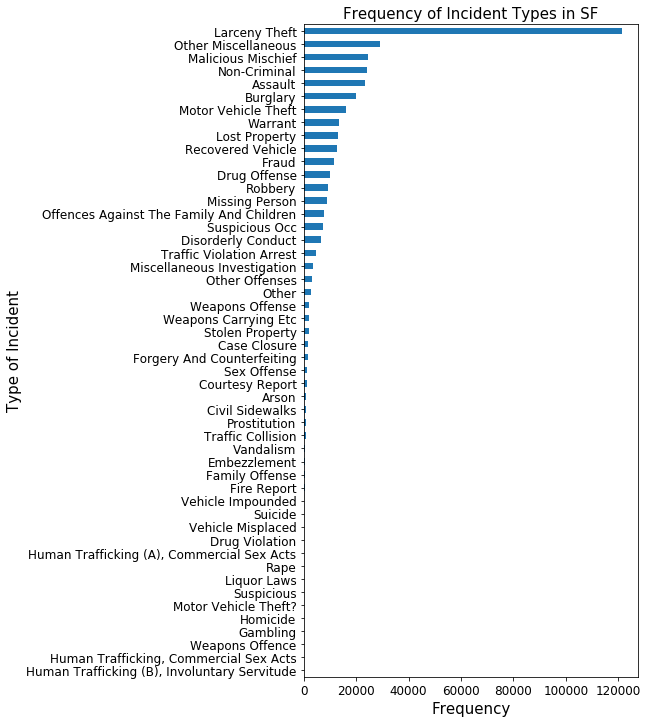

In [252]:
ax = SF_all_crime.plot.barh(figsize=(6,12), label="Type of Incident", fontsize = 12)

# fig, ax = plt.subplots(1)

# ax.barh(SF_all_crime, width=.5)
ax.get_legend().remove()
# ax.legend(ax.label)
ax.set_title('Frequency of Incident Types in SF', fontsize = 15)
ax.set_ylabel('Type of Incident', fontsize=15)
ax.set_xlabel('Frequency', fontsize=15)
# ax = df.plot.bar(figsize = (12,6), fontsize = 15, rot=90, width=1)
plt.show()

In [255]:
no_larceny = SF_all_crime[:-1:]

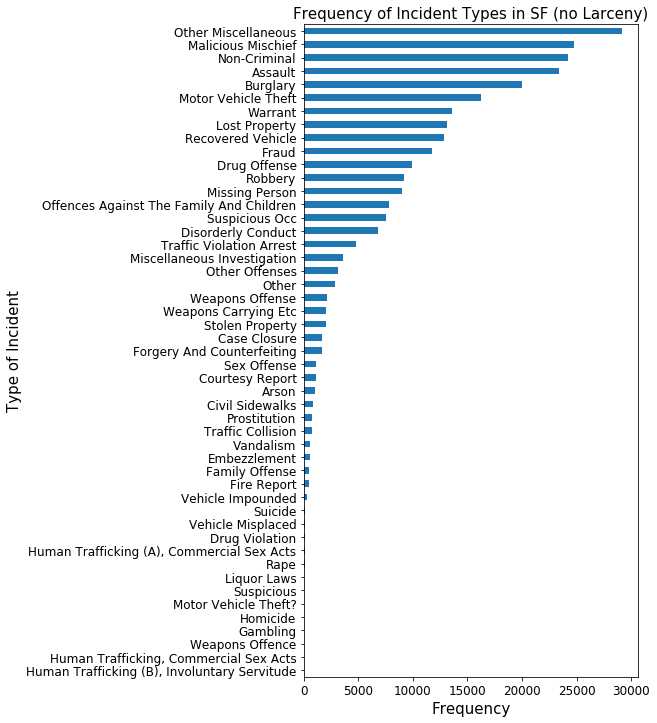

In [256]:
ax = no_larceny.plot.barh(figsize=(6,12), fontsize = 12)

# fig, ax = plt.subplots(1)

# ax.barh(SF_all_crime, width=.5)
ax.get_legend().remove()
# ax.legend(ax.label)
ax.set_title('Frequency of Incident Types in SF (no Larceny)', fontsize = 15)
ax.set_ylabel('Type of Incident', fontsize=15)
ax.set_xlabel('Frequency', fontsize=15)
# ax = df.plot.bar(figsize = (12,6), fontsize = 15, rot=90, width=1)
plt.show()

In [28]:
# Types of Incidents by Year, 2018. 
# Plot this side by side as bar chart 2018 vs 2019, could do 2020 up to Oct 
data2[data['Incident Year']==2018].groupby('Incident Category')['Incident ID'].count().sort_values(axis=0, ascending=False)

Incident Category
Larceny Theft                                   48833
Other Miscellaneous                             11798
Non-Criminal                                     9625
Assault                                          9049
Malicious Mischief                               8875
Burglary                                         7107
Lost Property                                    5791
Warrant                                          5581
Motor Vehicle Theft                              5292
Fraud                                            4723
Recovered Vehicle                                4344
Drug Offense                                     4089
Missing Person                                   3694
Robbery                                          3630
Offences Against The Family And Children         2998
Suspicious Occ                                   2829
Disorderly Conduct                               2522
Traffic Violation Arrest                         2074
Miscellane

In [29]:
# Types of Incidents by Year, 2019
data2[data['Incident Year']==2019].groupby('Incident Category')['Incident ID'].count().sort_values(axis=0, ascending=False)

Incident Category
Larceny Theft                                 48869
Other Miscellaneous                           10692
Non-Criminal                                   9119
Malicious Mischief                             9037
Assault                                        8893
Burglary                                       6040
Lost Property                                  5468
Warrant                                        5431
Motor Vehicle Theft                            5388
Fraud                                          4573
Recovered Vehicle                              4256
Drug Offense                                   3649
Robbery                                        3455
Missing Person                                 3313
Offences Against The Family And Children       2853
Suspicious Occ                                 2850
Disorderly Conduct                             2830
Traffic Violation Arrest                       1834
Miscellaneous Investigation                   

In [25]:
data2.head()

Incident Date Incident Time  Incident Year Incident Day of Week  \
0    2020/08/15         12:43           2020             Saturday   
1    2018/01/18         19:00           2018             Thursday   
2    2020/08/16         03:13           2020               Sunday   
3    2020/08/16         03:38           2020               Sunday   
4    2020/08/15         09:40           2020             Saturday   

          Report Datetime  Incident ID  Incident Number   CAD Number  \
0  2020/08/15 12:58:00 PM       953087        200490354  202281583.0   
1  2018/01/22 04:59:00 PM       649997        186068683          NaN   
2  2020/08/16 03:14:00 AM       953196        200491669  202290313.0   
3  2020/08/16 04:56:00 AM       953262        200491738  202290404.0   
4  2020/08/15 06:21:00 PM       953227        206121692          NaN   

  Report Type Description Filed Online  Incident Code   Incident Category  \
0                 Initial          NaN           4134             Assault   
1        Coplogic Initial         True          71000       Lost Property   
2                 Initial          NaN           4083             Assault   
3                 Initial          NaN          28100  Malicious Mischief   
4        Coplogic Initial         True           6244       Larceny Theft   

     Incident Subcategory                              Incident Description  \
0          Simple Assault                                           Battery   
1           Lost Property                                     Lost Property   
2      Aggravated Assault  Firearm, Discharging in Grossly Negligent Manner   
3               Vandalism              Malicious Mischief, Breaking Windows   
4  Larceny - From Vehicle                 Theft, From Locked Vehicle, >$950   

       Resolution            Intersection Police District  \
0  Open or Active  GENEVA AVE \ LONDON ST       Ingleside   
1  Open or Active                     NaN       Out of SF   
2  Open or Active   23RD ST \ ARKANSAS ST         Bayview   
3  Open or Active   VALENCIA ST \ 15TH ST         Mission   
4  Open or Active                     NaN            Park   

  Analysis Neighborhood   Latitude   Longitude  \
0             Excelsior  37.716039 -122.440255   
1                   NaN        NaN         NaN   
2          Potrero Hill  37.754827 -122.397729   
3               Mission  37.766540 -122.422044   
4                   NaN        NaN         NaN   

                                       point  Current Police Districts  \
0  (37.716038818883085, -122.44025513581519)                       9.0   
1                                        NaN                       NaN   
2   (37.75482657770952, -122.39772873392515)                       2.0   
3   (37.76653957529556, -122.42204381448558)                       3.0   
4                                        NaN                       NaN   

   Analysis Neighborhoods  
0                     7.0  
1                     NaN  
2                    26.0  
3                    20.0  
4                     NaN

In [24]:
import pandas as pd

test = data2['Incident Time']

0    12:43
1    19:00
2    03:13
3    03:38
4    09:40
Name: Incident Time, dtype: object

In [6]:
data2.head(2)

Incident Date Incident Time  Incident Year Incident Day of Week  \
0    2020/08/15         12:43           2020             Saturday   
1    2018/01/18         19:00           2018             Thursday   

          Report Datetime  Incident ID  Incident Number   CAD Number  \
0  2020/08/15 12:58:00 PM       953087        200490354  202281583.0   
1  2018/01/22 04:59:00 PM       649997        186068683          NaN   

  Report Type Description Filed Online  Incident Code Incident Category  \
0                 Initial          NaN           4134           Assault   
1        Coplogic Initial         True          71000     Lost Property   

  Incident Subcategory Incident Description      Resolution  \
0       Simple Assault              Battery  Open or Active   
1        Lost Property        Lost Property  Open or Active   

             Intersection Police District Analysis Neighborhood   Latitude  \
0  GENEVA AVE \ LONDON ST       Ingleside             Excelsior  37.716039   
1                     NaN       Out of SF                   NaN        NaN   

    Longitude                                      point  \
0 -122.440255  (37.716038818883085, -122.44025513581519)   
1         NaN                                        NaN   

   Current Police Districts  Analysis Neighborhoods  
0                       9.0                     7.0  
1                       NaN                     NaN

In [11]:
data2.groupby('Incident Category').#how many incidents per neighborhood

AssertionError: 

In [ ]:
in each neighborhood, what was the most frequent kind of incident reported?

In [157]:
data2.groupby(['Analysis Neighborhood','Incident Category']).count()

Incident Date  \
Analysis Neighborhood          Incident Category                                             
Bayview Hunters Point          Arson                                                   126   
                               Assault                                                2152   
                               Burglary                                                923   
                               Case Closure                                             61   
                               Courtesy Report                                          76   
                               Disorderly Conduct                                      635   
                               Drug Offense                                            223   
                               Drug Violation                                           12   
                               Embezzlement                                             67   
                               Family Offense                                          111   
                               Fire Report                                              81   
                               Forgery And Counterfeiting                               82   
                               Fraud                                                   531   
                               Gambling                                                  2   
                               Homicide                                                  4   
                               Human Trafficking (A), Commercial Sex Acts                3   
                               Larceny Theft                                          3554   
                               Liquor Laws                                               2   
                               Lost Property                                           341   
                               Malicious Mischief                                     1704   
                               Miscellaneous Investigation                             366   
                               Missing Person                                          589   
                               Motor Vehicle Theft                                    1766   
                               Motor Vehicle Theft?                                      5   
                               Non-Criminal                                           1273   
                               Offences Against The Family And Children                805   
                               Other                                                   150   
                               Other Miscellaneous                                    1856   
                               Other Offenses                                          216   
                               Prostitution                                              2   
                               Rape                                                      6   
                               Recovered Vehicle                                      1554   
                               Robbery                                                 675   
                               Sex Offense                                              27   
                               Stolen Property                                         124   
                               Suicide                                                  11   
                               Suspicious                                                1   
                               Suspicious Occ                                          641   
                               Traffic Collision                                        94   
                               Traffic Violation Arrest                                214   
                               Vandalism                                                36   
                               Vehi

In [18]:
table = data2[['Analysis Neighborhood','Incident Category']]
table.iloc[:2]

Analysis Neighborhood Incident Category
0             Excelsior           Assault
1                   NaN     Lost Property

In [32]:
data2.groupby(['Analysis Neighborhood','Incident Category'])['Incident ID'].count()

Analysis Neighborhood           Incident Category                           
Bayview Hunters Point           Arson                                             126
                                Assault                                          2152
                                Burglary                                          923
                                Case Closure                                       61
                                Courtesy Report                                    76
                                Disorderly Conduct                                635
                                Drug Offense                                      223
                                Drug Violation                                     12
                                Embezzlement                                       67
                                Family Offense                                    111
                                Fire Report                    

In [158]:
test = data2.groupby(['Analysis Neighborhood','Incident Category'])['Incident ID'].count()

In [57]:
test['Bayview Hunters Point'].sort_values(axis=0, ascending=False)[:5:] #Bayview most: Larceny Theft, least: Suspicious

Incident Category
Larceny Theft          3554
Assault                2152
Other Miscellaneous    1856
Motor Vehicle Theft    1766
Malicious Mischief     1704
Name: Incident ID, dtype: int64

In [152]:
# test['Bernal Heights'].sort_values(axis=0, ascending=False)[:5:]

In [151]:
# test['Castro/Upper Market'].sort_values(axis=0, ascending=False)[:5:]

In [150]:
# test['Chinatown'].sort_values(axis=0, ascending=False)[:5:]

In [149]:
# test['Excelsior'].sort_values(axis=0, ascending=False)[:5:]

In [62]:
test['Financial District/South Beach'].sort_values(axis=0, ascending=False)[:5:]

Incident Category
Larceny Theft          12912
Other Miscellaneous     2812
Burglary                2174
Malicious Mischief      2101
Assault                 1883
Name: Incident ID, dtype: int64

In [63]:
test['Glen Park'].sort_values(axis=0, ascending=False)[:5:]

Incident Category
Larceny Theft          643
Burglary               158
Non-Criminal           142
Malicious Mischief     129
Motor Vehicle Theft    129
Name: Incident ID, dtype: int64

In [148]:
# test['Golden Gate Park'].sort_values(axis=0, ascending=False)[:5:]

In [147]:
# test['Castro/Upper Market'].sort_values(axis=0, ascending=False)[:5:]

In [146]:
# test['Haight Ashbury'].sort_values(axis=0, ascending=False)[:5:]

In [145]:
# test['Hayes Valley'].sort_values(axis=0, ascending=False)[:5:]

In [144]:
# test['Inner Richmond'].sort_values(axis=0, ascending=False)[:5:]

In [143]:
# test['Inner Sunset'].sort_values(axis=0, ascending=False)[:5:]

In [142]:
# test['Japantown'].sort_values(axis=0, ascending=False)[:5:]

In [141]:
# test['Lakeshore'].sort_values(axis=0, ascending=False)[:5:]

In [140]:
# test['Lone Mountain/USF'].sort_values(axis=0, ascending=False)[:5:]

In [139]:
# test['Marina'].sort_values(axis=0, ascending=False)[:5:]

In [138]:
# test['Mission Bay'].sort_values(axis=0, ascending=False)[:5:]

In [137]:
# test['Nob Hill'].sort_values(axis=0, ascending=False)[:5:]

In [136]:
# test['Noe Valley'].sort_values(axis=0, ascending=False)[:5:]

In [135]:
# test['North Beach'].sort_values(axis=0, ascending=False)[:5:]

In [134]:
# test['Oceanview/Merced/Ingleside'].sort_values(axis=0, ascending=False)[:5:]

In [133]:
# test['Outer Mission'].sort_values(axis=0, ascending=False)[:5:]

In [131]:
# test['Outer Richmond'].sort_values(axis=0, ascending=False)[:5:]

In [132]:
# (test['Outer Richmond']+test['Inner Richmond']).sort_values(axis=0, ascending=False)[:5:]

In [130]:
# test['Pacific Heights'].sort_values(axis=0, ascending=False)[:5:]

In [129]:
# test['Portola'].sort_values(axis=0, ascending=False)[:5:]

In [128]:
# test['Potrero Hill'].sort_values(axis=0, ascending=False)[:5:]

In [92]:
(test['Presidio']+test['Presidio Heights']).sort_values(axis=0, ascending=False)[:5:]

Incident Category
Larceny Theft          1260.0
Burglary                237.0
Non-Criminal            188.0
Other Miscellaneous     187.0
Malicious Mischief      181.0
Name: Incident ID, dtype: float64

In [127]:
# test['Russian Hill'].sort_values(axis=0, ascending=False)[:5:]

In [94]:
test['Seacliff'].sort_values(axis=0, ascending=False)[:5:]

Incident Category
Larceny Theft          152
Non-Criminal            48
Motor Vehicle Theft     41
Burglary                34
Malicious Mischief      25
Name: Incident ID, dtype: int64

In [95]:
test['South of Market'].sort_values(axis=0, ascending=False)[:5:]

Incident Category
Larceny Theft          7040
Other Miscellaneous    2955
Assault                2525
Non-Criminal           2383
Warrant                1973
Name: Incident ID, dtype: int64

In [126]:
# test['Sunset/Parkside'].sort_values(axis=0, ascending=False)[:5:]

In [97]:
test['Tenderloin'].sort_values(axis=0, ascending=False)[:5:]

Incident Category
Larceny Theft          7175
Drug Offense           4512
Other Miscellaneous    3622
Assault                3357
Non-Criminal           3180
Name: Incident ID, dtype: int64

In [98]:
test['Treasure Island'].sort_values(axis=0, ascending=False)[:5:]

Incident Category
Larceny Theft         245
Assault               118
Burglary              109
Malicious Mischief    104
Non-Criminal          101
Name: Incident ID, dtype: int64

In [99]:
test['Twin Peaks'].sort_values(axis=0, ascending=False)[:5:]

Incident Category
Larceny Theft          932
Non-Criminal           135
Burglary               127
Malicious Mischief     117
Other Miscellaneous     85
Name: Incident ID, dtype: int64

In [125]:
# test['Visitacion Valley'].sort_values(axis=0, ascending=False)[:5:]

In [124]:
# test['West of Twin Peaks'].sort_values(axis=0, ascending=False)[:5:]

In [118]:
# test['Western Addition'].sort_values(axis=0, ascending=False)[:5:]

In [159]:
test['Mission'].sort_values(axis=0, ascending=False)[:5:]

Incident Category
Larceny Theft          9791
Other Miscellaneous    4748
Assault                3381
Non-Criminal           2538
Malicious Mischief     2467
Name: Incident ID, dtype: int64

In [108]:
data2[data2['Analysis Neighborhood'].isnull() == True].head(3)

Incident Date Incident Time  Incident Year Incident Day of Week  \
1     2018/01/18         19:00           2018             Thursday   
4     2020/08/15         09:40           2020             Saturday   
32    2020/08/14         09:45           2020               Friday   

           Report Datetime  Incident ID  Incident Number  CAD Number  \
1   2018/01/22 04:59:00 PM       649997        186068683         NaN   
4   2020/08/15 06:21:00 PM       953227        206121692         NaN   
32  2020/08/14 12:57:00 PM       953236        206121448         NaN   

   Report Type Description Filed Online  Incident Code Incident Category  \
1         Coplogic Initial         True          71000     Lost Property   
4         Coplogic Initial         True           6244     Larceny Theft   
32        Coplogic Initial         True           6244     Larceny Theft   

      Incident Subcategory               Incident Description      Resolution  \
1            Lost Property                      Lost Property  Open or Active   
4   Larceny - From Vehicle  Theft, From Locked Vehicle, >$950  Open or Active   
32  Larceny - From Vehicle  Theft, From Locked Vehicle, >$950  Open or Active   

   Intersection Police District Analysis Neighborhood  Latitude  Longitude  \
1           NaN       Out of SF                   NaN       NaN        NaN   
4           NaN            Park                   NaN       NaN        NaN   
32          NaN        Richmond                   NaN       NaN        NaN   

   point  Current Police Districts  Analysis Neighborhoods  
1    NaN                       NaN                     NaN  
4    NaN                       NaN                     NaN  
32   NaN                       NaN                     NaN

In [235]:
data2[data2['Incident Category'] == 'Motor Vehicle Theft?'].head(10)

Incident Date Incident Time  Incident Year Incident Day of Week  \
4711     2020/08/29         18:15           2020             Saturday   
7592     2020/09/07         21:55           2020               Monday   
16073    2020/10/06         13:29           2020              Tuesday   
16451    2020/10/07         11:37           2020            Wednesday   
34961    2018/02/07         15:14           2018            Wednesday   
35245    2018/02/08         08:03           2018             Thursday   
35717    2018/02/09         13:18           2018               Friday   
48874    2018/03/14         11:17           2018            Wednesday   
50235    2018/03/17         09:30           2018             Saturday   
54813    2018/03/29         15:00           2018             Thursday   

              Report Datetime  Incident ID  Incident Number   CAD Number  \
4711   2020/08/29 06:19:00 PM       957095        200520638  202422498.0   
7592   2020/09/07 09:59:00 PM       959519        200531312  202513163.0   
16073  2020/10/06 01:29:00 PM       967248        200602139  202801704.0   
16451  2020/10/07 11:37:00 AM       967536        200602139  202801704.0   
34961  2018/02/07 03:14:00 PM       632947        180102091  180382427.0   
35245  2018/02/08 08:15:00 AM       633199        180101043  180390760.0   
35717  2018/02/09 01:18:00 PM       633613        180101043  180380603.0   
48874  2018/03/14 11:17:00 AM       645750        180193896  180731565.0   
50235  2018/03/17 09:48:00 PM       646972        180202027  180763556.0   
54813  2018/03/29 05:10:00 PM       651136        180234155  180882861.0   

      Report Type Description Filed Online  Incident Code  \
4711          Vehicle Initial          NaN           7027   
7592       Initial Supplement          NaN           7027   
16073                 Initial          NaN           7027   
16451      Initial Supplement          NaN           7027   
34961                 Initial          NaN           7027   
35245      Initial Supplement          NaN           7027   
35717      Initial Supplement          NaN           7027   
48874                 Initial          NaN           7027   
50235      Vehicle Supplement          NaN           7027   
54813                 Initial          NaN           7027   

          Incident Category Incident Subcategory  Incident Description  \
4711   Motor Vehicle Theft?  Motor Vehicle Theft  Auto, Grand Theft of   
7592   Motor Vehicle Theft?  Motor Vehicle Theft  Auto, Grand Theft of   
16073  Motor Vehicle Theft?  Motor Vehicle Theft  Auto, Grand Theft of   
16451  Motor Vehicle Theft?  Motor Vehicle Theft  Auto, Grand Theft of   
34961  Motor Vehicle Theft?  Motor Vehicle Theft  Auto, Grand Theft of   
35245  Motor Vehicle Theft?  Motor Vehicle Theft  Auto, Grand Theft of   
35717  Motor Vehicle Theft?  Motor Vehicle Theft  Auto, Grand Theft of   
48874  Motor Vehicle Theft?  Motor Vehicle Theft  Auto, Grand Theft of   
50235  Motor Vehicle Theft?  Motor Vehicle Theft  Auto, Grand Theft of   
54813  Motor Vehicle Theft?  Motor Vehicle Theft  Auto, Grand Theft of   

                 Resolution                  Intersection Police District  \
4711   Cite or Arrest Adult           JUDAH ST \ 11TH AVE         Taraval   
7592   Cite or Arrest Adult          30TH AVE \ LAWTON ST         Taraval   
16073  Cite or Arrest Adult         FRONT ST \ HALLECK ST         Central   
16451  Cite or Arrest Adult       WEBSTER ST \ FILBERT ST        Northern   
34961  Cite or Arrest Adult        LONDON ST \ BRAZIL AVE       Ingleside   
35245  Cite or Arrest Adult  EXCELSIOR AVE \ EDINBURGH ST       Ingleside   
35717  Cite or Arrest Adult  EXCELSIOR AVE \ EDINBURGH ST       Ingleside   
48874  Cite or Arrest Adult        MISSION ST \ LASKIE ST        Southern   
50235  Cite or Arrest Adult            POLK ST \ CEDAR ST        Northern   
54813  Cite or Arrest Adult        ALAMEDA ST \ BRYANT ST         Mission   

                Analysis Neigh

In [234]:
data2['Incident Number'].count()

394315

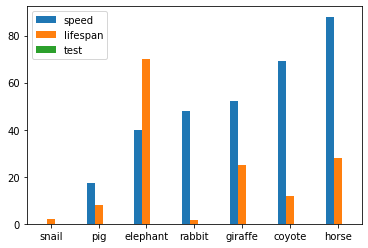

In [117]:
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
test = [0,0,0,0,0,0,0]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant',
         'rabbit', 'giraffe', 'coyote', 'horse']
df = pd.DataFrame({'speed': speed,
                   'lifespan': lifespan, 'test': test}, index=index)
ax = df.plot.bar(rot=0)

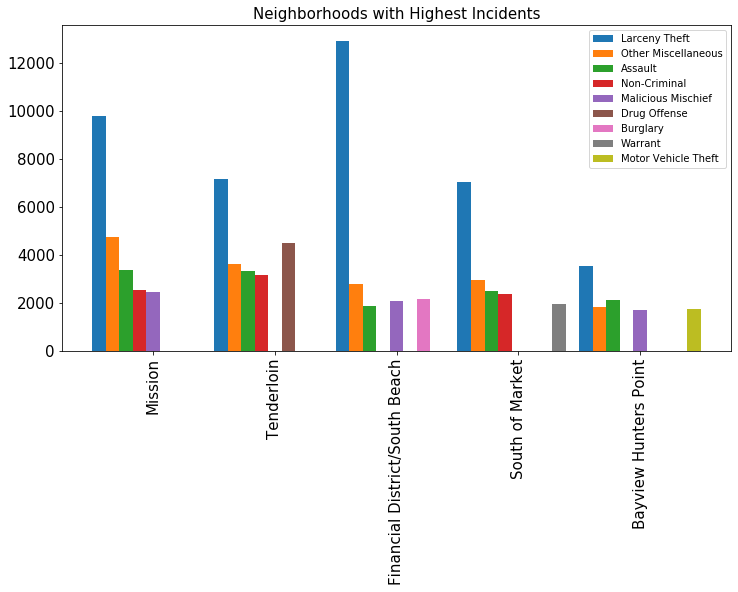

In [189]:
import matplotlib.pyplot as plt
%matplotlib inline

Larceny_Theft = [9791, 7175, 12912,7040, 3554]
Other_Miscellaneous = [4748, 3622, 2812,2955,1856]
Assault = [3381, 3347, 1883,2525,2152]
NonCriminal = [2538, 3180, 0,2383,0]
Malicious_Mischief = [2467,0,2101,0,1704]
Drug_Offense = [0,4512,0,0,0]
Burglary = [0,0,2174,0,0]
Warrant = [0,0,0,1973,0]
Motor_Vehicle_Theft = [0,0,0,0,1766]

# fig, ax = plt.subplots(1, figsize = (10,10))

index = ['Mission', 'Tenderloin', 'Financial District/South Beach', 'South of Market', 'Bayview Hunters Point']

df = pd.DataFrame({'Larceny Theft': Larceny_Theft,
                   'Other Miscellaneous': Other_Miscellaneous, 
                   'Assault': Assault,
                   'Non-Criminal': NonCriminal,
                   'Malicious Mischief': Malicious_Mischief,
                   'Drug Offense': Drug_Offense,
                   'Burglary': Burglary,
                   'Warrant': Warrant,
                   'Motor Vehicle Theft': Motor_Vehicle_Theft}, index=index)
ax = df.plot.bar(figsize = (12,6), fontsize = 15, rot=90, width=1)
ax.set_title('Neighborhoods with Highest Incidents', fontsize=15)

plt.show()

In [257]:
data2.head(1) #add: #incidents

Incident Date Incident Time  Incident Year Incident Day of Week  \
0    2020/08/15         12:43           2020             Saturday   

          Report Datetime  Incident ID  Incident Number   CAD Number  \
0  2020/08/15 12:58:00 PM       953087        200490354  202281583.0   

  Report Type Description Filed Online  Incident Code Incident Category  \
0                 Initial          NaN           4134           Assault   

  Incident Subcategory Incident Description      Resolution  \
0       Simple Assault              Battery  Open or Active   

             Intersection Police District Analysis Neighborhood   Latitude  \
0  GENEVA AVE \ LONDON ST       Ingleside             Excelsior  37.716039   

    Longitude                                      point  \
0 -122.440255  (37.716038818883085, -122.44025513581519)   

   Current Police Districts  Analysis Neighborhoods  
0                       9.0                     7.0

In [339]:
Incidents_by_Neighborhood2 = pd.DataFrame(data2.groupby('Analysis Neighborhood')['Incident ID'].count())

In [355]:
data2['Incident ID'].count()

394315

In [360]:
sum(Incidents_by_Neighborhood2['Incident ID'])

373883

In [341]:
Incidents_by_Neighborhood2['Incident ID']/data2['Incident ID'].count()

Incident ID
Analysis Neighborhood                      
Bayview Hunters Point                 22585
Bernal Heights                         6691
Castro/Upper Market                   11547
Chinatown                              7304
Excelsior                              6268
Financial District/South Beach        33121
Glen Park                              1970
Golden Gate Park                       3970
Haight Ashbury                         6394
Hayes Valley                          10466
Inner Richmond                         4993
Inner Sunset                           4555
Japantown                              3785
Lakeshore                              4436
Lincoln Park                            471
Lone Mountain/USF                      4661
Marina                                 9461
McLaren Park                            397
Mission                               42318
Mission Bay                            6511
Nob Hill                              10901
Noe Valley                             3653
North Beach                           11258
Oceanview/Merced/Ingleside             3895
Outer Mission                          5282
Outer Richmond                         8443
Pacific Heights                        6559
Portola                                4146
Potrero Hill                           6233
Presidio                                863
Presidio Heights                       2358
Russian Hill                           8575
Seacliff                                455
South of Market                       32096
Sunset/Parkside                       10997
Tenderloin                            38871
Treasure Island                        1245
Twin Peaks                             1951
Visitacion Valley                      4291
West of Twin Peaks                     7462
Western Addition                      12445

In [382]:
# percent of incident reports that are coming from each neighborhood
percent_reports = round(Incidents_by_Neighborhood2['Incident ID']/data2['Incident ID'].count(),2)

In [383]:
percent_reports

Analysis Neighborhood
Bayview Hunters Point             0.06
Bernal Heights                    0.02
Castro/Upper Market               0.03
Chinatown                         0.02
Excelsior                         0.02
Financial District/South Beach    0.08
Glen Park                         0.00
Golden Gate Park                  0.01
Haight Ashbury                    0.02
Hayes Valley                      0.03
Inner Richmond                    0.01
Inner Sunset                      0.01
Japantown                         0.01
Lakeshore                         0.01
Lincoln Park                      0.00
Lone Mountain/USF                 0.01
Marina                            0.02
McLaren Park                      0.00
Mission                           0.11
Mission Bay                       0.02
Nob Hill                          0.03
Noe Valley                        0.01
North Beach                       0.03
Oceanview/Merced/Ingleside        0.01
Outer Mission                     0.01
Out

In [317]:
neighborhood_population = [20592, 24502, 14121, 6012, 23043, (10277+3843), 7619, 
                           151, 10476, 13740, 17086, 16998, 3484, 4699, 7266,
                          10400, 12651, 10972, 56872, 7291, 18800, 15169,
                          8000, (9510+3198+6566), 10899, 16603, 18917, 17152, 10825,
                           3244, 4016, 13549, 1347, 24608, (16134+18569), 22776, 3064, 3511,
                           20146, (990+2767+2867+3105+2040+554+1450+2851+1903+1754), 11449]

SF_population = [round(i/sum(neighborhood_population),2) for i in neighborhood_population]

percent_report = []
#divide neighborhood pop by SF pop to get neighborhood population ratio

# Incidents_by_Neighborhood2 = pd.DataFrame(data2.groupby('Analysis Neighborhood')['Incident ID'].count())
#divde crimes in neighborhood

# index = ['snail', 'pig', 'elephant',
#          'rabbit', 'giraffe', 'coyote', 'horse']

# df = pd.DataFrame({'speed': speed,
#                    'lifespan': lifespan, 'test': test}, index=index)


index = ['Bayview Hunters Point',
 'Bernal Heights',
 'Castro/Upper Market',
 'Chinatown',
 'Excelsior',
 'Financial District/South Beach',
 'Glen Park',
 'Golden Gate Park',
 'Haight Ashbury',
 'Hayes Valley',
 'Inner Richmond',
 'Inner Sunset',
 'Japantown',
 'Lakeshore',
 'Lincoln Park',
 'Lone Mountain/USF',
 'Marina',
 'McLaren Park',
 'Mission',
 'Mission Bay',
 'Nob Hill',
 'Noe Valley',
 'North Beach',
 'Oceanview/Merced/Ingleside',
 'Outer Mission',
 'Outer Richmond',
 'Pacific Heights',
 'Portola',
 'Potrero Hill',
 'Presidio',
 'Presidio Heights',
 'Russian Hill',
 'Seacliff',
 'South of Market',
 'Sunset/Parkside',
 'Tenderloin',
 'Treasure Island',
 'Twin Peaks',
 'Visitacion Valley',
 'West of Twin Peaks',
 'Western Addition']

population = pd.DataFrame({'Analysis Neighborhood': index, 'Neighborhood Population': neighborhood_population, 'Percent Population': SF_population}, index=index)

In [377]:
population
# .sort_values(by='Percent Population', ascending=False)

Analysis Neighborhood  \
Bayview Hunters Point                    Bayview Hunters Point   
Bernal Heights                                  Bernal Heights   
Castro/Upper Market                        Castro/Upper Market   
Chinatown                                            Chinatown   
Excelsior                                            Excelsior   
Financial District/South Beach  Financial District/South Beach   
Glen Park                                            Glen Park   
Golden Gate Park                              Golden Gate Park   
Haight Ashbury                                  Haight Ashbury   
Hayes Valley                                      Hayes Valley   
Inner Richmond                                  Inner Richmond   
Inner Sunset                                      Inner Sunset   
Japantown                                            Japantown   
Lakeshore                                            Lakeshore   
Lincoln Park                                      Lincoln Park   
Lone Mountain/USF                            Lone Mountain/USF   
Marina                                                  Marina   
McLaren Park                                      McLaren Park   
Mission                                                Mission   
Mission Bay                                        Mission Bay   
Nob Hill                                              Nob Hill   
Noe Valley                                          Noe Valley   
North Beach                                        North Beach   
Oceanview/Merced/Ingleside          Oceanview/Merced/Ingleside   
Outer Mission                                    Outer Mission   
Outer Richmond                                  Outer Richmond   
Pacific Heights                                Pacific Heights   
Portola                                                Portola   
Potrero Hill                                      Potrero Hill   
Presidio                                              Presidio   
Presidio Heights                              Presidio Heights   
Russian Hill                                      Russian Hill   
Seacliff                                              Seacliff   
South of Market                                South of Market   
Sunset/Parkside                                Sunset/Parkside   
Tenderloin                                          Tenderloin   
Treasure Island                                Treasure Island   
Twin Peaks                                          Twin Peaks   
Visitacion Valley                            Visitacion Valley   
West of Twin Peaks                          West of Twin Peaks   
Western Addition                              Western Addition   

                                Neighborhood Population  Percent Population  
Bayview Hunters Point                             20592                0.04  
Bernal Heights                                    24502                0.04  
Castro/Upper Market                               14121                0.02  
Chinatown                                          6012                0.01  
Excelsior                                         23043                0.04  
Financial District/South Beach                    14120                0.02  
Glen Park                                          7619                0.01  
Golden Gate Park                                    151                0.00  
Haight Ashbury                                    10476                0.02  
Hayes Valley                                      13740                0.02  
Inner Richmond                                    17086                0.03  
Inner Sunset                                      16998                0.03  
Japantown                                          3484                0.01  
Lakeshore                                          4699                0.01  
Lincoln Park                                       7266                0.01  
Lone Mountain/USF   

In [384]:
ratio = pd.concat([population, percent_reports], axis=1)

In [385]:
ratio

Analysis Neighborhood  \
Analysis Neighborhood                                            
Bayview Hunters Point                    Bayview Hunters Point   
Bernal Heights                                  Bernal Heights   
Castro/Upper Market                        Castro/Upper Market   
Chinatown                                            Chinatown   
Excelsior                                            Excelsior   
Financial District/South Beach  Financial District/South Beach   
Glen Park                                            Glen Park   
Golden Gate Park                              Golden Gate Park   
Haight Ashbury                                  Haight Ashbury   
Hayes Valley                                      Hayes Valley   
Inner Richmond                                  Inner Richmond   
Inner Sunset                                      Inner Sunset   
Japantown                                            Japantown   
Lakeshore                                            Lakeshore   
Lincoln Park                                      Lincoln Park   
Lone Mountain/USF                            Lone Mountain/USF   
Marina                                                  Marina   
McLaren Park                                      McLaren Park   
Mission                                                Mission   
Mission Bay                                        Mission Bay   
Nob Hill                                              Nob Hill   
Noe Valley                                          Noe Valley   
North Beach                                        North Beach   
Oceanview/Merced/Ingleside          Oceanview/Merced/Ingleside   
Outer Mission                                    Outer Mission   
Outer Richmond                                  Outer Richmond   
Pacific Heights                                Pacific Heights   
Portola                                                Portola   
Potrero Hill                                      Potrero Hill   
Presidio                                              Presidio   
Presidio Heights                              Presidio Heights   
Russian Hill                                      Russian Hill   
Seacliff                                              Seacliff   
South of Market                                South of Market   
Sunset/Parkside                                Sunset/Parkside   
Tenderloin                                          Tenderloin   
Treasure Island                                Treasure Island   
Twin Peaks                                          Twin Peaks   
Visitacion Valley                            Visitacion Valley   
West of Twin Peaks                          West of Twin Peaks   
Western Addition                              Western Addition   

                                Neighborhood Population  Percent Population  \
Analysis Neighborhood                                                         
Bayview Hunters Point                             20592                0.04   
Bernal Heights                                    24502                0.04   
Castro/Upper Market                               14121                0.02   
Chinatown                                          6012                0.01   
Excelsior                                         23043                0.04   
Financial District/South Beach                    14120                0.02   
Glen Park                                          7619                0.01   
Golden Gate Park                                    151                0.00   
Haight Ashbury                                    10476                0.02   
Hayes Valley                                      13740                0.02   
Inner Richmond                                    17086                0.03   
Inner Sunset                                      16998                0.03   
Japantown                                          3484                0.01   
Lakeshore        

In [387]:
ratio.rename(columns={"Analysis Neighborhood": "Neighborhood", 'Incident ID': "Percent Incidents"}).head(2)

Neighborhood  Neighborhood Population  \
Analysis Neighborhood                                                   
Bayview Hunters Point  Bayview Hunters Point                    20592   
Bernal Heights                Bernal Heights                    24502   

                       Percent Population  Percent Incidents  
Analysis Neighborhood                                         
Bayview Hunters Point                0.04               0.06  
Bernal Heights                       0.04               0.02

In [389]:
ratio['Difference'] = ratio['Percent Population'] - ratio['Incident ID']

In [390]:
ratio.head(3)

Analysis Neighborhood  Neighborhood Population  \
Analysis Neighborhood                                                   
Bayview Hunters Point  Bayview Hunters Point                    20592   
Bernal Heights                Bernal Heights                    24502   
Castro/Upper Market      Castro/Upper Market                    14121   

                       Percent Population  Incident ID  Difference  
Analysis Neighborhood                                               
Bayview Hunters Point                0.04         0.06       -0.02  
Bernal Heights                       0.04         0.02        0.02  
Castro/Upper Market                  0.02         0.03       -0.01

In [396]:
# ratio.sort_values(by='Difference')
final_ratio = ratio.rename(columns={"Analysis Neighborhood": "Neighborhood", 'Incident ID': "Percent Incidents"}).sort_values(by='Difference', ascending=False)

In [397]:
final_ratio

Neighborhood  \
Analysis Neighborhood                                            
Sunset/Parkside                                Sunset/Parkside   
Excelsior                                            Excelsior   
Bernal Heights                                  Bernal Heights   
McLaren Park                                      McLaren Park   
Portola                                                Portola   
Visitacion Valley                            Visitacion Valley   
Oceanview/Merced/Ingleside          Oceanview/Merced/Ingleside   
Noe Valley                                          Noe Valley   
Inner Richmond                                  Inner Richmond   
Inner Sunset                                      Inner Sunset   
Lone Mountain/USF                            Lone Mountain/USF   
Lincoln Park                                      Lincoln Park   
Outer Mission                                    Outer Mission   
Presidio                                              Presidio   
Treasure Island                                Treasure Island   
Glen Park                                            Glen Park   
Twin Peaks                                          Twin Peaks   
Outer Richmond                                  Outer Richmond   
Pacific Heights                                Pacific Heights   
West of Twin Peaks                          West of Twin Peaks   
Lakeshore                                            Lakeshore   
Presidio Heights                              Presidio Heights   
Marina                                                  Marina   
Japantown                                            Japantown   
Seacliff                                              Seacliff   
Haight Ashbury                                  Haight Ashbury   
Russian Hill                                      Russian Hill   
Potrero Hill                                      Potrero Hill   
Nob Hill                                              Nob Hill   
Mission                                                Mission   
Western Addition                              Western Addition   
Hayes Valley                                      Hayes Valley   
Castro/Upper Market                        Castro/Upper Market   
Mission Bay                                        Mission Bay   
Golden Gate Park                              Golden Gate Park   
Chinatown                                            Chinatown   
North Beach                                        North Beach   
Bayview Hunters Point                    Bayview Hunters Point   
South of Market                                South of Market   
Financial District/South Beach  Financial District/South Beach   
Tenderloin                                          Tenderloin   

                                Neighborhood Population  Percent Population  \
Analysis Neighborhood                                                         
Sunset/Parkside                                   34703                0.06   
Excelsior                                         23043                0.04   
Bernal Heights                                    24502                0.04   
McLaren Park                                      10972                0.02   
Portola                                           17152                0.03   
Visitacion Valley                                 20146                0.03   
Oceanview/Merced/Ingleside                        19274                0.03   
Noe Valley                                        15169                0.03   
Inner Richmond                                    17086                0.03   
Inner Sunset                                      16998                0.03   
Lone Mountain/USF                                 10400                0.02   
Lincoln Park                                       7266                0.01   
Outer Mission                                     10899                0.02   
Presidio                  

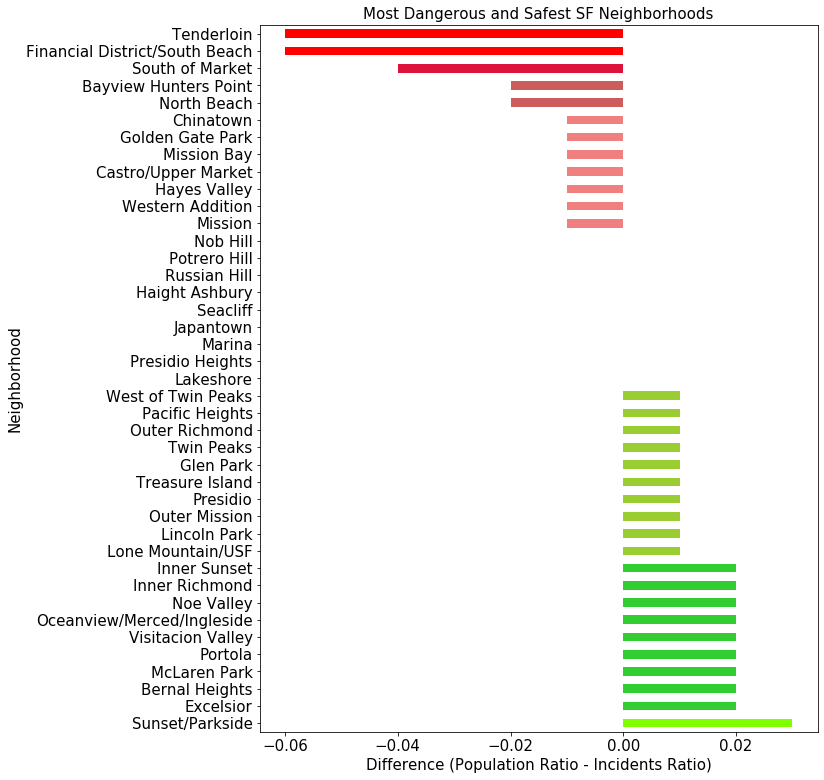

In [487]:
import matplotlib.colors

ax = final_ratio['Difference'].plot.barh(figsize=(10,13), fontsize=15, 
#                                          color=['green','green','green','green','green','green',
#                                                'green','green','green','green','green','green',
#                                                'green','green','green','green','green','green','green',
#                                                'green','red','red','red','red','red','red','red','red',
#                                                'red','red','red','red','red','red','red','red',
#                                                'red','red','red','red','red','red','red','red'])
                                            color=['chartreuse','limegreen','limegreen','limegreen','limegreen','limegreen',
                                               'limegreen','limegreen','limegreen','limegreen','yellowgreen','yellowgreen',
                                               'yellowgreen','yellowgreen','yellowgreen','yellowgreen','yellowgreen','yellowgreen','yellowgreen',
                                               'yellowgreen','red','red','red','red','red','red','lightcoral','lightcoral',
                                               'lightcoral','lightcoral','lightcoral','lightcoral','lightcoral','lightcoral','lightcoral','lightcoral',
                                               'indianred','indianred','crimson','red','red'])
ax.set_title('Most Dangerous and Safest SF Neighborhoods', fontsize=15)
ax.set_ylabel('Neighborhood', fontsize=15)
ax.set_xlabel('Difference (Population Ratio - Incidents Ratio)', fontsize=15)

# ax2 =final_ratio['Difference'][3:6:].plot.barh(figsize=(12,15))

# fig, ax = plt.subplots(1, figsize=(12,15))
# plt.barh(final_ratio['Difference'], width =.5)
plt.show()

In [311]:
population['Percent Population'].sum()

0.99

In [320]:
full = pd.merge(data3, population, on='Analysis Neighborhood')

In [327]:
full[full['Analysis Neighborhood'] == 'Seacliff'].head(10)

Incident Date Incident Time  Incident Year Incident Day of Week  \
324846    2020/08/16         14:37           2020               Sunday   
324847    2020/08/16         14:37           2020               Sunday   
324848    2020/08/16         14:37           2020               Sunday   
324849    2020/08/16         14:37           2020               Sunday   
324850    2020/08/12         12:00           2020            Wednesday   
324851    2020/08/12         12:00           2020            Wednesday   
324852    2020/05/20         13:00           2020            Wednesday   
324853    2020/06/04         20:00           2020             Thursday   
324854    2020/08/22         12:55           2020             Saturday   
324855    2020/08/24         23:00           2020               Monday   

               Report Datetime  Incident ID  Incident Number   CAD Number  \
324846  2020/08/16 02:44:00 PM       953324        200492576  202291804.0   
324847  2020/08/16 02:44:00 PM       953324        200492576  202291804.0   
324848  2020/08/16 09:50:00 PM       953417        200492576  202291804.0   
324849  2020/08/16 09:50:00 PM       953417        200492576  202291804.0   
324850  2020/08/17 04:20:00 PM       953992        200495257  202302463.0   
324851  2020/08/17 04:20:00 PM       953992        200495257  202302463.0   
324852  2020/08/18 01:37:00 PM       953911        200497043  202311798.0   
324853  2020/06/06 08:34:00 AM       954409        206123438          NaN   
324854  2020/08/22 02:17:00 PM       955237        206124721          NaN   
324855  2020/08/25 12:04:00 AM       955750        200510833  202380005.0   

       Report Type Description Filed Online  Incident Code  \
324846                 Initial          NaN          15200   
324847                 Initial          NaN          15040   
324848      Initial Supplement          NaN          15200   
324849      Initial Supplement          NaN          15040   
324850                 Initial          NaN           5022   
324851                 Initial          NaN          28150   
324852                 Initial          NaN           9027   
324853        Coplogic Initial         True           6374   
324854        Coplogic Initial         True           6372   
324855         Vehicle Initial          NaN           7041   

                               Incident Category    Incident Subcategory  \
324846  Offences Against The Family And Children                   Other   
324847  Offences Against The Family And Children         Family Offenses   
324848  Offences Against The Family And Children                   Other   
324849  Offences Against The Family And Children         Family Offenses   
324850                                  Burglary  Burglary - Residential   
324851                        Malicious Mischief               Vandalism   
324852                                     Fraud                   Fraud   
324853                             Larceny Theft   Larceny Theft - Other   
324854                             Larceny Theft   Larceny Theft - Other   
324855                         Recovered Vehicle       Recovered Vehicle   

                                     Incident Description  \
324846                 Domestic Violence (secondary only)   
324847  Spouse, Cohabitee, Parent of Child in Common, ...   
324848                 Domestic Violence (secondary only)   
324849  Spouse, Cohabitee, Parent of Child in Common, ...   
324850                Burglary, Flat, Att. Forcible Entry   
324851          Malicious Mischief, Vandalism to Property   
324852                                  False Personation   
324853                       Theft, Other Property, >$950   
324854                    Theft, Other Property, $50-$200   
324855                           Vehicle, Recovered, Auto   

                  Resolution                  Intersection Police District  \
324846  Cite or Arrest Adult  EL CAMINO DEL MAR \ 26TH AVE        Richmond

In [313]:
data3 = data2.copy()

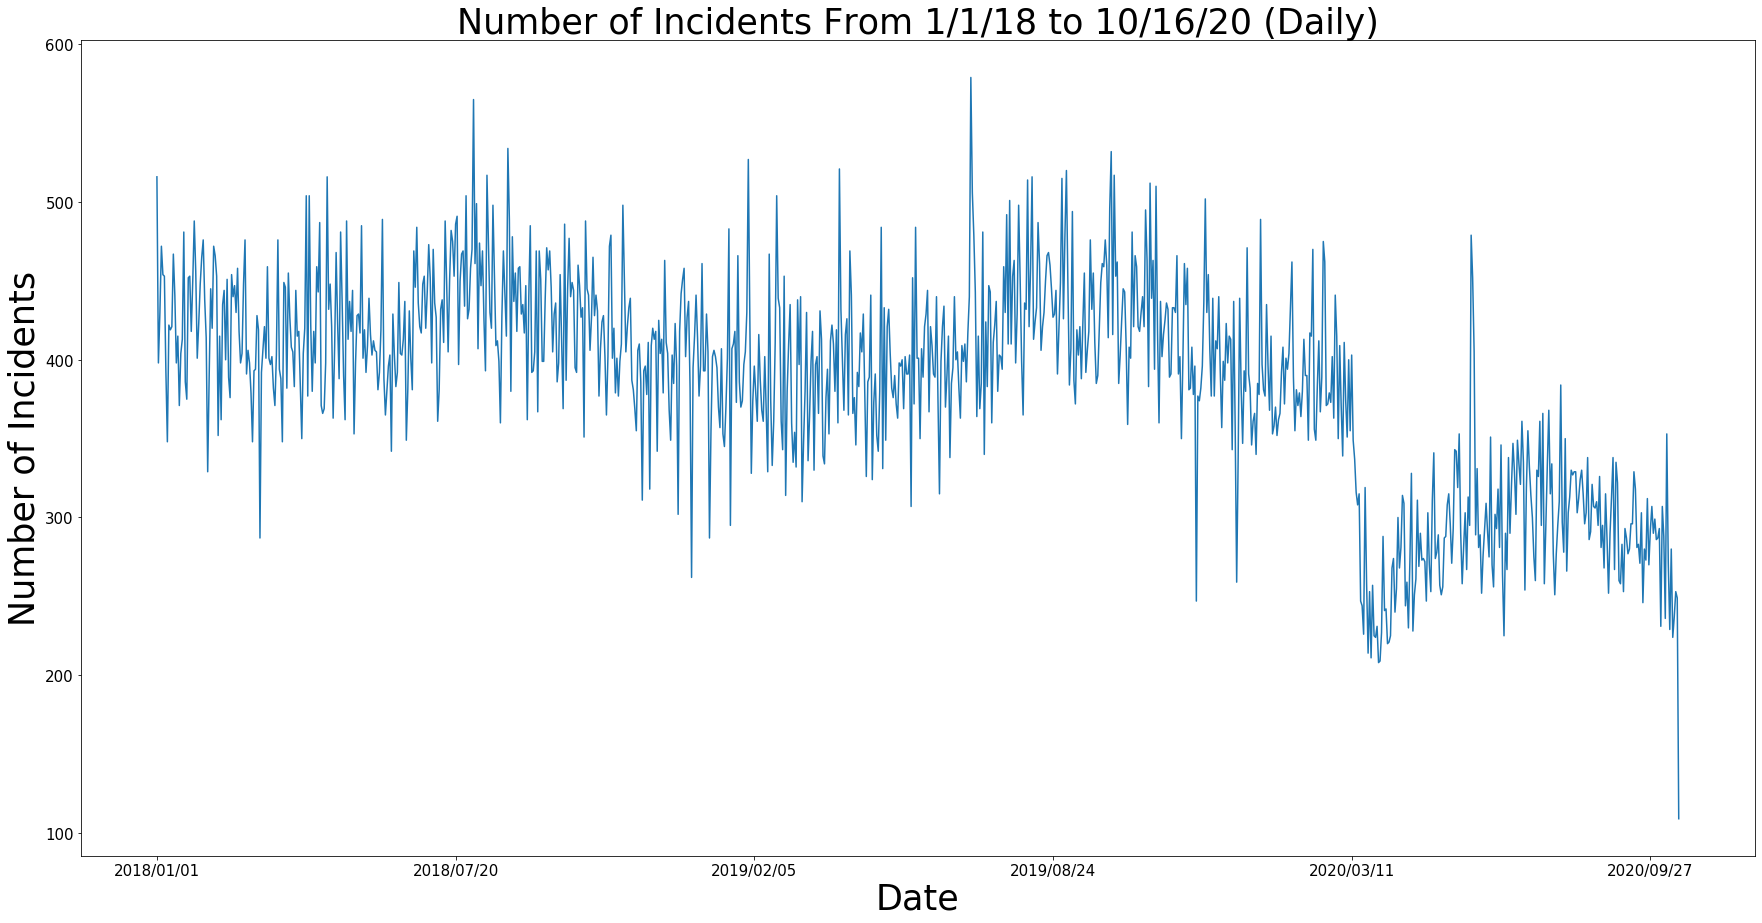

In [296]:
for i in data3:
    if data3['Analysis Neighborhood'] == 'Bayview Hunters Point':
        data3['Neighborhood Population'] = 20592

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [261]:
for i in set(data2['Analysis Neighborhood']):
    if i == 'Bayview Hunters Point':
        data3['Neighborhood Population'] = 20592 

{'Bayview Hunters Point',
 'Bernal Heights',
 'Castro/Upper Market',
 'Chinatown',
 'Excelsior',
 'Financial District/South Beach',
 'Glen Park',
 'Golden Gate Park',
 'Haight Ashbury',
 'Hayes Valley',
 'Inner Richmond',
 'Inner Sunset',
 'Japantown',
 'Lakeshore',
 'Lincoln Park',
 'Lone Mountain/USF',
 'Marina',
 'McLaren Park',
 'Mission',
 'Mission Bay',
 'Nob Hill',
 'Noe Valley',
 'North Beach',
 'Oceanview/Merced/Ingleside',
 'Outer Mission',
 'Outer Richmond',
 'Pacific Heights',
 'Portola',
 'Potrero Hill',
 'Presidio',
 'Presidio Heights',
 'Russian Hill',
 'Seacliff',
 'South of Market',
 'Sunset/Parkside',
 'Tenderloin',
 'Treasure Island',
 'Twin Peaks',
 'Visitacion Valley',
 'West of Twin Peaks',
 'Western Addition',
 nan}

In [280]:
data3['Neighborhood Population'] = 0

In [281]:
data3.head(1)

Incident Date Incident Time  Incident Year Incident Day of Week  \
0    2020/08/15         12:43           2020             Saturday   

          Report Datetime  Incident ID  Incident Number   CAD Number  \
0  2020/08/15 12:58:00 PM       953087        200490354  202281583.0   

  Report Type Description Filed Online  Incident Code Incident Category  \
0                 Initial          NaN           4134           Assault   

  Incident Subcategory Incident Description      Resolution  \
0       Simple Assault              Battery  Open or Active   

             Intersection Police District Analysis Neighborhood   Latitude  \
0  GENEVA AVE \ LONDON ST       Ingleside             Excelsior  37.716039   

    Longitude                                      point  \
0 -122.440255  (37.716038818883085, -122.44025513581519)   

   Current Police Districts  Analysis Neighborhoods  Neighborhood Population  
0                       9.0                     7.0                        0

In [288]:
for i in set(data2['Analysis Neighborhood']):
    if i == 'Bayview Hunters Point':
        data3[data3['Neighborhood Population']=='Bayview Hunters Point']= 20592
    else:
        pass

/home/connie/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [287]:
data3.head()

Incident Date Incident Time  Incident Year Incident Day of Week  \
0    2020/08/15         12:43           2020             Saturday   
1    2018/01/18         19:00           2018             Thursday   
2    2020/08/16         03:13           2020               Sunday   
3    2020/08/16         03:38           2020               Sunday   
4    2020/08/15         09:40           2020             Saturday   

          Report Datetime  Incident ID  Incident Number   CAD Number  \
0  2020/08/15 12:58:00 PM       953087        200490354  202281583.0   
1  2018/01/22 04:59:00 PM       649997        186068683          NaN   
2  2020/08/16 03:14:00 AM       953196        200491669  202290313.0   
3  2020/08/16 04:56:00 AM       953262        200491738  202290404.0   
4  2020/08/15 06:21:00 PM       953227        206121692          NaN   

  Report Type Description Filed Online  Incident Code   Incident Category  \
0                 Initial          NaN           4134             Assault   
1        Coplogic Initial         True          71000       Lost Property   
2                 Initial          NaN           4083             Assault   
3                 Initial          NaN          28100  Malicious Mischief   
4        Coplogic Initial         True           6244       Larceny Theft   

     Incident Subcategory                              Incident Description  \
0          Simple Assault                                           Battery   
1           Lost Property                                     Lost Property   
2      Aggravated Assault  Firearm, Discharging in Grossly Negligent Manner   
3               Vandalism              Malicious Mischief, Breaking Windows   
4  Larceny - From Vehicle                 Theft, From Locked Vehicle, >$950   

       Resolution            Intersection Police District  \
0  Open or Active  GENEVA AVE \ LONDON ST       Ingleside   
1  Open or Active                     NaN       Out of SF   
2  Open or Active   23RD ST \ ARKANSAS ST         Bayview   
3  Open or Active   VALENCIA ST \ 15TH ST         Mission   
4  Open or Active                     NaN            Park   

  Analysis Neighborhood   Latitude   Longitude  \
0             Excelsior  37.716039 -122.440255   
1                   NaN        NaN         NaN   
2          Potrero Hill  37.754827 -122.397729   
3               Mission  37.766540 -122.422044   
4                   NaN        NaN         NaN   

                                       point  Current Police Districts  \
0  (37.716038818883085, -122.44025513581519)                       9.0   
1                                        NaN                       NaN   
2   (37.75482657770952, -122.39772873392515)                       2.0   
3   (37.76653957529556, -122.42204381448558)                       3.0   
4                                        NaN                       NaN   

   Analysis Neighborhoods  Neighborhood Population  
0                     7.0                    20592  
1                     NaN                    20592  
2                    26.0                    20592  
3                    20.0                    20592  
4                     NaN                    20592

In [292]:
data2.loc('Bayview Hunters Point').head()

ValueError: No axis named Bayview Hunters Point for object type <class 'pandas.core.frame.DataFrame'>

In [301]:
x = [20592, 24502, 14121, 6012, 23043, (10277+3843), 7619, 
                           151, 10476, 13740, 17086, 16998, 3484, 4699, 7266,
                          10400, 12651, 10972, 56872, 7291, 18800, 15169,
                          8000, (9510+3198+6566), 10899, 16603, 18917, 17152, 10825,
                           3244, 4016, 13549, 1347, 24608, (16134+18569), 22776, 3064, 3511,
                           20146, (990+2767+2867+3105+2040+554+1450+2851+1903+1754), 11449]

sum(x)

580428

In [298]:
len(x)

41

In [454]:
matplotlib.colors
import numpy as np

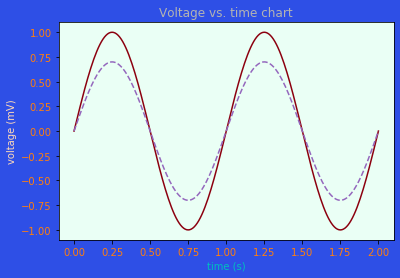

In [459]:
t = np.linspace(0.0, 2.0, 201)
s = np.sin(2 * np.pi * t)

# 1) RGB tuple:
fig, ax = plt.subplots(facecolor=(.18, .31, .90))
# 2) hex string:
ax.set_facecolor('#eafff5')
# 3) gray level string:
ax.set_title('Voltage vs. time chart', color='0.7')
# 4) single letter color string
ax.set_xlabel('time (s)', color='c')
# 5) a named color:
ax.set_ylabel('voltage (mV)', color='peachpuff')
# 6) a named xkcd color:
ax.plot(t, s, 'xkcd:crimson')
# 7) Cn notation:
ax.plot(t, .7*s, color='C4', linestyle='--')
# 8) tab notation:
ax.tick_params(labelcolor='tab:orange')

In [489]:
data2.head(1)

Incident Date Incident Time  Incident Year Incident Day of Week  \
0    2020/08/15         12:43           2020             Saturday   

          Report Datetime  Incident ID  Incident Number   CAD Number  \
0  2020/08/15 12:58:00 PM       953087        200490354  202281583.0   

  Report Type Description Filed Online  Incident Code Incident Category  \
0                 Initial          NaN           4134           Assault   

  Incident Subcategory Incident Description      Resolution  \
0       Simple Assault              Battery  Open or Active   

             Intersection Police District Analysis Neighborhood   Latitude  \
0  GENEVA AVE \ LONDON ST       Ingleside             Excelsior  37.716039   

    Longitude                                      point  \
0 -122.440255  (37.716038818883085, -122.44025513581519)   

   Current Police Districts  Analysis Neighborhoods  
0                       9.0                     7.0

In [490]:
data2['Incident Date'].count()

394315

In [497]:
dates = data2.groupby('Incident Date')[['Incident ID']].count()

In [498]:
dates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1020 entries, 2018/01/01 to 2020/10/16
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Incident ID  1020 non-null   int64
dtypes: int64(1)
memory usage: 15.9+ KB


In [499]:
dates.head()

Incident ID
Incident Date             
2018/01/01             516
2018/01/02             398
2018/01/03             430
2018/01/04             472
2018/01/05             454